# NewsOptimism

####  *A way to quantify the goodness of the article based on the vocabulary content of the news article*

### NOTE: A sample analysis for single article taken from CNN webpage on Dec 3rd 2017

### Learning Resources:
1. [collocation](https://www.youtube.com/watch?v=Kf25kCKuOUI)
2. [Unicode and WHy?](https://www.youtube.com/watch?v=sqPTR_v4qFA)
3. [concordance](http://www.nltk.org/book/ch01.html)
4. [vader sentiment analysis](http://www.nltk.org/howto/sentiment.html)
5. [ALl about vader](http://t-redactyl.io/blog/2017/04/using-vader-to-handle-sentiment-analysis-with-social-media-text.html)

## STEP1: Install requirements

In [1]:
#The following commands import the modules, algorithms, corpora, lists that will be needed for exploratory book analysis
import nltk #imports the nltk module
nltk.download("words") # downloads English words
nltk.download("stopwords") # downloads English stopwords 
from nltk.text import Text #imports the Text module that enables the exploratory search of the text
from nltk import bigrams # imports the bigrams module
from nltk.collocations import * # imports the collocations methods
import string # imports string module that allows running processs on strings
from string import punctuation # imports punctuation symbols
import os #this module allows interfacing with the underlying operating system
import re #imports regular expression module 
from collections import OrderedDict #imports collections module, an alternative to list, dict, set, tuple
from nltk.draw import dispersion_plot
from IPython.display import display # a module that wraps the object to be displayed
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline
import string

[nltk_data] Downloading package words to /home/harish/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package stopwords to /home/harish/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# STEP 2: Data Preprocessing

### Exploring through Pandas Dataframe

In [2]:
os.chdir('/home/harish/PycharmProjects/NewsOptimism/')
df = pd.read_csv('csvdataset/12032017/cnn.csv')
df = df.dropna(how='any')

In [3]:
df.shape

(973, 6)

In [4]:
maxdf = {}
max_i = 0
for i in range(df.shape[0]):
    maxdf[i] = len(str(df['TEXT'].iloc[i]))
print(sorted(maxdf.items(), key=lambda x:x[1], reverse=True)[:10])

[(576, 69924), (77, 68707), (747, 50964), (230, 38367), (497, 36668), (582, 36488), (630, 34847), (412, 34630), (611, 33119), (759, 32342)]


In [5]:
#WHICH ID are you trying to analyze:
id_num = sorted(maxdf.items(), key=lambda x:x[1], reverse=True)[:1][0][0]
id_num

576

In [6]:
df['TITLE'].iloc[id_num]

'The naked truth'

In [7]:
df['SUMMARY'].iloc[id_num]

'To her 5,000 friends and thousands more followers on Facebook, Paulette was already a hero.\n"I lost my mother to breast cancer but I know if she were alive, she would be walking with you -- the whole way.\nIt was God who woke her up one night in December 2013 to tell her she had breast cancer, which doctors later confirmed.\nShe worried a lump under her arm was the return of breast cancer, and supporters overwhelmed her with more prayers.\nAnnette Johnson, a longtime acquaintance of PauletteAnd then there was this: She told Paulette she was marrying her long-lost love.'

In [8]:
#Testing with single text:
data = str(df['TEXT'][id_num])
data = data.replace("\n","")

In [9]:
words_string = nltk.word_tokenize(data)
words_string#need to remove punctuations# todo
len(words_string)

13989

## Removing stop words:


In [10]:
stopwords = set(nltk.corpus.stopwords.words("english"))

In [11]:
#To remove single character's punctations(char len 2) and stopwords; also lower words:
words_string = [word.lower() for word in words_string if (len(word) > 2 and word.lower() not in stopwords)]
# reduced list:
len(words_string)

6224

In [12]:
#converting back to text
textList = Text(words_string)
textList[:5]

['cnn', 'behind', 'double-mastectomy', 'scars', 'run']

## STEP 3: Text Analysis

### Freq Distribution

In [13]:
fdist = nltk.FreqDist(words_string)
for word, freq in fdist.most_common(10):
    display("%s %d" % (str(word), freq))

'paulette 261'

'said 155'

'cancer 79'

"n't 76"

'told 57'

'walk 50'

'story 47'

'day 45'

'could 44'

'one 40'

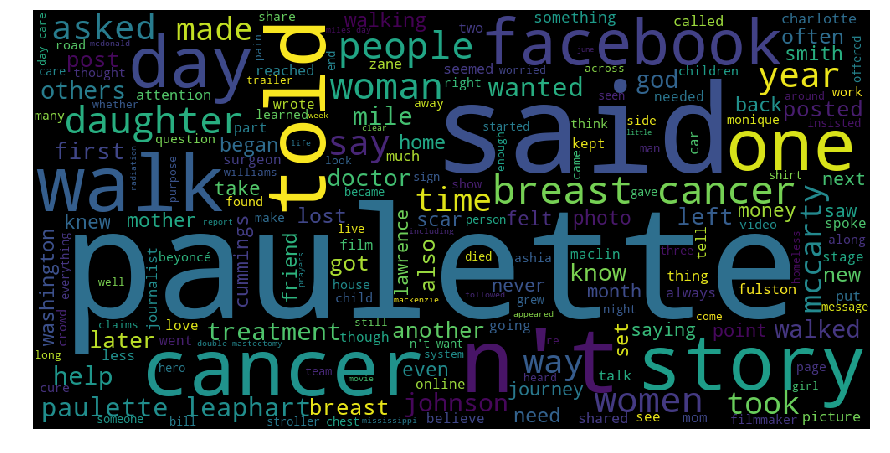

In [14]:
from wordcloud import WordCloud as wc
wordcloud1 = wc(width = 1000, height = 500).generate(' '.join(textList))
plt.figure(figsize=(15,8))
plt.imshow(wordcloud1)
plt.axis("off")
plt.show()

### Finding some context:
where does the *word* occur in the context

In [15]:
textList.concordance('woman')

Displaying 25 of 28 matches:
ed walk away paulette story even one woman life saved thanks conversation paule
t cancer five years october said one woman nine years cancer-free said another 
 one man survived lymphoma himself.a woman driven night took shirt reveal tangl
ry step way love wrote another brave woman year phenomenal woman wrote third lo
 another brave woman year phenomenal woman wrote third lost mother breast cance
tographed.she said people surrounded woman began cry onlookers applauded paulet
internet ever put down.only one said woman n't know spreading lies criminal rec
 know spreading lies criminal record woman suspected crazy jealous woman determ
record woman suspected crazy jealous woman determined ignore.what documentary g
ested god knows could leave homeless woman someone reached wondering could orga
rly mccarty paulette chief adversary woman paulette said spreading lies her.pau
east cancer deeply personal decision woman makes doctor.perhaps paulette radiat
 facebook p

In [16]:
textList.similar('woman')
# textList._word_context_index.similar_words('woman')

cure story


In [17]:
#builds a text index object: based on the textlist
textIndex = nltk.text.ContextIndex(textList)

In [18]:
#how similar is the word 'cancer'
sorted(textIndex.word_similarity_dict('cancer').items(), key=lambda x:x[1], reverse=True)[:5]

[('cancer', 1.0),
 ('african-american', 0.02631578947368421),
 ('implants', 0.02631578947368421),
 ('convicted', 0),
 ('abandoning', 0)]

## A lexical dispersion plot will plot occurences of words in a text

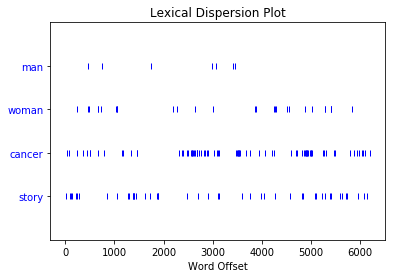

In [19]:
textList.dispersion_plot(['man','woman', 'cancer', "story"])

In [20]:
#Print collocations derived from the text, ignoring stopwords.
textList.collocations()

breast cancer; paulette leaphart; reconstructive surgery; could n't;
new orleans; double mastectomy; care center; seven months; north
carolina; tested positive; n't want; 're going; medical records;
social media; 5,000 month; long-lost love; miles day; day care;
criminal record; hostile unsafe


In [21]:
bigram_measures = nltk.collocations.BigramAssocMeasures() # obtains bigram association measures


finder = BigramCollocationFinder.from_words(words_string, 5) # finds bigrams in the text
finder.apply_freq_filter(5) #removes bigrams that appear less than 5 times
bigrams = finder.nbest(bigram_measures.likelihood_ratio, 10) #obtain the bigrams with the highest likelihood ratio
print('\n'.join('%s %s' % v for v in bigrams)) #printing them out

breast cancer
reconstructive surgery
need need
medical records
could n't
new orleans
need woman
paulette leaphart
care center
're going


## Determining the window size

In [22]:
# If we are interested in examining the surrounding context of a particular word in the text, we need to decide on the parameters of that context.
# If, for example, we are interested in three words that precede a particular word and three words after then we are interested in a 7-word window size.
# This window size can be established as follows:
ngrams = [words_string[i:i+7] for i in range(len(words_string)-6)]# http://digitalhistoryhacks.blogspot.com/2006/08/easy-pieces-in-python-keyword-in.html
    
kwicdict = {}           # opens up a kwicdict        
for n in ngrams: #indexes the fourth word in a sliding window of 7 (three words on each side) 
    if n[3] not in kwicdict: 
        kwicdict[n[3]] = [n]
    else:
        kwicdict[n[3]].append(n)
        
for n in kwicdict['woman']: # nicely formatted output for the word we are interested in determining the context for
    outstring = ' '.join(n[:3]).rjust(30) #output as a string and right justify first three words in the sliding window
    outstring += str(n[3]).center(len(n[3])+6) # output as a string and center fourth word in the sliding window
    outstring += ' '.join(n[4:]) # output as a string last three words in the sliding window of 7 consecutive words in the text
    print(outstring)

                story even one   woman   life saved thanks
              october said one   woman   nine years cancer-free
   survived lymphoma himself.a   woman   driven night took
           wrote another brave   woman   year phenomenal woman
         woman year phenomenal   woman   wrote third lost
        said people surrounded   woman   began cry onlookers
            down.only one said   woman   n't know spreading
          lies criminal record   woman   suspected crazy jealous
       suspected crazy jealous   woman   determined ignore.what documentary
          could leave homeless   woman   someone reached wondering
      paulette chief adversary   woman   paulette said spreading
      deeply personal decision   woman   makes doctor.perhaps paulette
    posts critical pauletteone   woman   get caught carmen
    marveled calling strongest   woman   alive.local reporters popped
               done walked one   woman   chest discolored radiation
       sure oncologist surgeon   wo

## Named Entities Extraction

In [23]:
nltk.download("punkt") # downloads punkt tokenizer models
nltk.download('averaged_perceptron_tagger') # downloads the algorithm for predicting the part of speech information
nltk.download('maxent_ne_chunker') # downloads the maximum entropy chunker that has been trained on the ACE 2004 corpus https://catalog.ldc.upenn.edu/LDC2005T09
from nltk import word_tokenize, pos_tag, ne_chunk #imports a word tokenizer, part of speech tagger and named entity tagger

[nltk_data] Downloading package punkt to /home/harish/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/harish/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /home/harish/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!


In [24]:

#function for extracting named entities:
def extract_entity_names(t, entity_type): # this function has been defined here: https://gist.github.com/onyxfish/322906
    entity_names = []

    if hasattr(t, 'label') and t.label:
        if t.label() == entity_type:
            entity_names.append(' '.join([child[0] for child in t]))
        else:
            for child in t:
                entity_names.extend(extract_entity_names(child, entity_type))

    return entity_names

In [25]:
# sentence tokenization
sentences = nltk.sent_tokenize(data)
sentences[:5]

['(CNN) Behind the double-mastectomy scars that run across her bare chest, she had a story to tell.So late last April, Paulette Leaphart embarked on a 1,000-mile walk from her childhood hometown of Biloxi, Mississippi, to the halls of Congress in Washington.And she did it topless.The breast cancer survivor screamed for a cure and demanded better and more affordable health care.',
 'She wanted women without breasts to believe in their beauty and be proud of their strength.',
 'By showcasing and embracing her scars, she hoped to inspire others to do the same.Her journey was bold, visual, moving.',
 "It offered a hero to admire and, given Paulette's audacious decision to walk shirtless in the face of strangers, a rich spectacle to witness.",
 'It spoke to African-American women, who face the highest breast cancer mortality rate.']

In [26]:
len(sentences)

589

In [27]:
# word tokenization
words = [nltk.word_tokenize(sent) for sent in sentences] # rather than tokenizing the entire file that has been converted into a string, this function tokenizes each of the sentence -- the sentence boundaries are maintained

In [28]:
words[:10]

[['(',
  'CNN',
  ')',
  'Behind',
  'the',
  'double-mastectomy',
  'scars',
  'that',
  'run',
  'across',
  'her',
  'bare',
  'chest',
  ',',
  'she',
  'had',
  'a',
  'story',
  'to',
  'tell.So',
  'late',
  'last',
  'April',
  ',',
  'Paulette',
  'Leaphart',
  'embarked',
  'on',
  'a',
  '1,000-mile',
  'walk',
  'from',
  'her',
  'childhood',
  'hometown',
  'of',
  'Biloxi',
  ',',
  'Mississippi',
  ',',
  'to',
  'the',
  'halls',
  'of',
  'Congress',
  'in',
  'Washington.And',
  'she',
  'did',
  'it',
  'topless.The',
  'breast',
  'cancer',
  'survivor',
  'screamed',
  'for',
  'a',
  'cure',
  'and',
  'demanded',
  'better',
  'and',
  'more',
  'affordable',
  'health',
  'care',
  '.'],
 ['She',
  'wanted',
  'women',
  'without',
  'breasts',
  'to',
  'believe',
  'in',
  'their',
  'beauty',
  'and',
  'be',
  'proud',
  'of',
  'their',
  'strength',
  '.'],
 ['By',
  'showcasing',
  'and',
  'embracing',
  'her',
  'scars',
  ',',
  'she',
  'hoped',
  't

In [29]:
tagged_sentences = [nltk.pos_tag(word) for word in words] # for each sentence in words (sentence boundaries are maintained in words) assign the most probable part of speech for each word in the sentence


In [30]:
tagged_sentences

[[('(', '('),
  ('CNN', 'NNP'),
  (')', ')'),
  ('Behind', 'IN'),
  ('the', 'DT'),
  ('double-mastectomy', 'JJ'),
  ('scars', 'NNS'),
  ('that', 'WDT'),
  ('run', 'VBP'),
  ('across', 'IN'),
  ('her', 'PRP$'),
  ('bare', 'NN'),
  ('chest', 'NN'),
  (',', ','),
  ('she', 'PRP'),
  ('had', 'VBD'),
  ('a', 'DT'),
  ('story', 'NN'),
  ('to', 'TO'),
  ('tell.So', 'VB'),
  ('late', 'JJ'),
  ('last', 'JJ'),
  ('April', 'NNP'),
  (',', ','),
  ('Paulette', 'NNP'),
  ('Leaphart', 'NNP'),
  ('embarked', 'VBD'),
  ('on', 'IN'),
  ('a', 'DT'),
  ('1,000-mile', 'JJ'),
  ('walk', 'NN'),
  ('from', 'IN'),
  ('her', 'PRP$'),
  ('childhood', 'NN'),
  ('hometown', 'NN'),
  ('of', 'IN'),
  ('Biloxi', 'NNP'),
  (',', ','),
  ('Mississippi', 'NNP'),
  (',', ','),
  ('to', 'TO'),
  ('the', 'DT'),
  ('halls', 'NNS'),
  ('of', 'IN'),
  ('Congress', 'NNP'),
  ('in', 'IN'),
  ('Washington.And', 'NNP'),
  ('she', 'PRP'),
  ('did', 'VBD'),
  ('it', 'PRP'),
  ('topless.The', 'VB'),
  ('breast', 'NN'),
  ('cancer',

In [31]:
nltk.download('tagsets')
nltk.help.upenn_tagset()

[nltk_data] Downloading package tagsets to /home/harish/nltk_data...
[nltk_data]   Package tagsets is already up-to-date!
$: dollar
    $ -$ --$ A$ C$ HK$ M$ NZ$ S$ U.S.$ US$
'': closing quotation mark
    ' ''
(: opening parenthesis
    ( [ {
): closing parenthesis
    ) ] }
,: comma
    ,
--: dash
    --
.: sentence terminator
    . ! ?
:: colon or ellipsis
    : ; ...
CC: conjunction, coordinating
    & 'n and both but either et for less minus neither nor or plus so
    therefore times v. versus vs. whether yet
CD: numeral, cardinal
    mid-1890 nine-thirty forty-two one-tenth ten million 0.5 one forty-
    seven 1987 twenty '79 zero two 78-degrees eighty-four IX '60s .025
    fifteen 271,124 dozen quintillion DM2,000 ...
DT: determiner
    all an another any both del each either every half la many much nary
    neither no some such that the them these this those
EX: existential there
    there
FW: foreign word
    gemeinschaft hund ich jeux habeas Haementeria Herr K'ang-si vous
   

In [32]:
gpe = []
# locations = [] # opens an empty list for locations
gpe =[] #opens an empty list for geopolitical entities
persons = [] #opens an empty list for persons
organizations = [] #opens an empty list for organizations


for i in tagged_sentences: # for each part of speech tagged sentence in a tagged_sentences list, extract named entities based on the chunking
    chunked_sentence = nltk.ne_chunk(i, binary=False) # predict which noun phrases in the text are named entities. If binary is set to True, ask the model to predict whether something is a named entity or not. If set to False, the model predicts the type of named entity.   
#     print(chunked_sentence)
#     break
    gpe.extend(extract_entity_names(chunked_sentence, 'GPE'))#extract geopolitical entities from the text
    #locations.extend(extract_entity_names(chunked_sentence, 'LOCATION')) # extract loctions from the text
    persons.extend(extract_entity_names(chunked_sentence, 'PERSON')) #extract persons from the text
    organizations.extend(extract_entity_names(chunked_sentence, 'ORGANIZATION')) #extract organizations from the text


In [33]:
set(organizations)

{'Affordable Care',
 'American Cancer Society',
 'BRCA',
 'BeyoncéIt',
 'CBS',
 'CNN',
 'Cadillac',
 'Capitol',
 'Catholic',
 'Centers',
 'Century Cures Act',
 'Congress',
 'Cook Out',
 'Cummings',
 'Democratic',
 'ESPN',
 'Facebook',
 'Finney',
 'Forrest Gump',
 'Fort Worth',
 'GoFundMe',
 'GodI',
 'ID',
 'IRS',
 'Labor',
 'LeaphartApropos',
 'LeaphartIt',
 'MD Anderson',
 'MRI',
 'MacKenzie',
 'McCarty',
 'McDonald',
 'Mercedes',
 'Michigan',
 'Mississippi',
 'PauletteIt',
 'PauletteOne',
 'Santa Claus',
 'Susan',
 'THE',
 'US',
 'United State',
 'Upworthy',
 'backI',
 'crowdShe',
 'defensePorsha Cummings',
 'directionPart',
 'espnW Pegasus Award',
 'espnW Women',
 'messageOne',
 'questionsThe',
 'recordsPaulette',
 'woesAs'}

In [34]:
# # why McDonald?
# for n in kwicdict['mcdonald']: # nicely formatted output for the word we are interested in determining the context for
#     outstring = ' '.join(n[:3]).rjust(30) #output as a string and right justify first three words in the sliding window
#     outstring += str(n[3]).center(len(n[3])+6) # output as a string and center fourth word in the sliding window
#     outstring += ' '.join(n[4:]) # output as a string last three words in the sliding window of 7 consecutive words in the text
#     print(outstring)

## Note: MCdonald is the name of the person not the restuarant chain

In [35]:
set(persons)

{'Adams',
 'Always Beautiful',
 'Angelina Jolie',
 'Annette',
 'Ashia',
 'Ashia McDonald',
 'Auntie Paulette',
 'Barack Obama',
 'Barbara',
 'Barbara Smith',
 'Beyoncé',
 'Biloxi Beach',
 'Blue Ivy',
 'Brenda McDonald',
 'Candy',
 'Candy McDonald',
 'Carmen Lawrence',
 'Chantay Savage',
 'Charlotte',
 'Child',
 'Christmas',
 'Craig Leaphart',
 'Cummings',
 'David McKenzie',
 'Destiny',
 'Director',
 'Disease Control',
 'Donald M. Payne Jr.',
 'Dusk',
 'Emily',
 'Emily MacKenzie',
 'Facebook',
 'Facebook Live',
 'Fantasia',
 'Filmmaker',
 'Finney',
 'Fulston',
 'Girls Trip',
 'God',
 'Harry',
 'Harry Connick Jr.',
 'Hill',
 'Jada Pinkett Smith',
 'Jamaica',
 'Jesus',
 'Jesus Storybook Bible',
 'John Conyers',
 'Johnson',
 'Katrina Adams',
 'Kenya',
 'Kimberly McCarty',
 'Labor',
 'Lawrence',
 'Leaphart',
 'Maclin',
 'Marriott',
 'Marwin Jones',
 'McCarty',
 'Melanye Maclin',
 'Memorial',
 'Michelle Obama',
 'Michigan',
 'Mom',
 'Monique',
 'Monique McDonald',
 'Nikky',
 'Nikky Finney',


In [36]:
from collections import Counter,OrderedDict

dict_persons = Counter(persons)
dict_persons.most_common(10)

[('Paulette', 230),
 ('Paulette Leaphart', 17),
 ('Johnson', 16),
 ('God', 8),
 ('Cummings', 8),
 ('Zane', 8),
 ('Beyoncé', 8),
 ('Ashia', 7),
 ('Smith', 7),
 ('Fulston', 7)]

### Extracting Noun phrases:

In [37]:
nounphrases = []
grammar = "NP: {<DT>?<JJ>*<NN>}" #running regular expressions on part of speech to obtain noun phrase constituents from the text
for sent in tagged_sentences:
    cp = nltk.RegexpParser(grammar)
    result = cp.parse(sent)
    for sent in result.subtrees():
            if sent.label() == "NP":
                nounphrases.append(str(sent.leaves()))
for i in nounphrases:
    print (i)

[('bare', 'NN')]
[('chest', 'NN')]
[('a', 'DT'), ('story', 'NN')]
[('a', 'DT'), ('1,000-mile', 'JJ'), ('walk', 'NN')]
[('childhood', 'NN')]
[('hometown', 'NN')]
[('breast', 'NN')]
[('cancer', 'NN')]
[('survivor', 'NN')]
[('a', 'DT'), ('cure', 'NN')]
[('affordable', 'JJ'), ('health', 'NN')]
[('care', 'NN')]
[('beauty', 'NN')]
[('strength', 'NN')]
[('the', 'DT'), ('same.Her', 'NN')]
[('journey', 'NN')]
[('a', 'DT'), ('hero', 'NN')]
[('audacious', 'JJ'), ('decision', 'NN')]
[('shirtless', 'NN')]
[('the', 'DT'), ('face', 'NN')]
[('a', 'DT'), ('rich', 'JJ'), ('spectacle', 'NN')]
[('breast', 'NN')]
[('cancer', 'NN')]
[('mortality', 'NN')]
[('rate', 'NN')]
[('someone', 'NN')]
[('the', 'DT'), ('disease.It', 'NN')]
[('a', 'DT'), ('storyteller', 'NN')]
[('dream', 'NN')]
[('reality', 'NN')]
[('potential', 'NN')]
[('a', 'DT'), ('producer', 'NN')]
[('a', 'DT'), ('shoot', 'NN')]
[('shirt', 'NN')]
[('story', 'NN')]
[('A', 'DT'), ('stunning', 'JJ'), ('trailer', 'NN')]
[('the', 'DT'), ('film', 'NN')]
[

## STEP4: Sentiment_Analysis

### Lexicon based approach:
[AFINN](http://neuro.imm.dtu.dk/wiki/AFINN) - Quantified Positive/negative vocabulary on a scale range of [-5,5]

In [38]:
# Download the AFINN lexicon, unzip, and read the latest word list in AFINN-111.txt
from collections import defaultdict
from io import BytesIO
from zipfile import ZipFile
from urllib.request import urlopen

url = urlopen('http://www2.compute.dtu.dk/~faan/data/AFINN.zip')
zipfile = ZipFile(BytesIO(url.read()))
afinn_file = zipfile.open('AFINN/AFINN-111.txt')

afinn = dict()

for line in afinn_file:
    parts = line.strip().split()
    if len(parts) == 2:
        afinn[parts[0].decode("utf-8")] = int(parts[1])

print('read %d AFINN terms.\nE.g.: %s' % (len(afinn), 
                                          str(list(afinn.items())[:10])))

read 2462 AFINN terms.
E.g.: [('exposes', -1), ('cancels', -1), ('mope', -1), ('true', 2), ('hated', -3), ('kiss', 2), ('seduced', -1), ('disputed', -2), ('infringement', -2), ('bright', 1)]


In [39]:
# How do we score a document?
ls = []
word_count = Counter()
def afinn_sentiment(terms, afinn):
    total = 0
    total_neg = 0
    total_pos = 0
    for t in terms:
        if t in afinn and len(t) > 2:
            ls.append(t)
#             print('\t%s=%d' % (t, afinn[t]))
            total += afinn[t]
            if afinn[t] > 0:
                total_pos += afinn[t]
            else:
                total_neg += afinn[t]
    return (total,total_pos,total_neg)
    
doc = df['TEXT'].iloc[id_num].split()
print('Distribution of Vocabularies sentiment in the article \nNet Sentiment of the terms %d \nSum of Positive terms %d \nSum of Negative terms %d' % (afinn_sentiment(doc, afinn)))

Distribution of Vocabularies sentiment in the article 
Net Sentiment of the terms 41 
Sum of Positive terms 428 
Sum of Negative terms -387


In [40]:
# def a():
#     return (41, 428, -387)
# print(a())
# print('Distribution of Vocabularies sentiment in the article \nNet Sentiment of the terms %d \nSum of Positive terms %d \nSum of Negative terms %d' % (a()))

In [41]:
word_count.update(ls)
print(sorted(word_count.items(), key=lambda x:x[1], reverse=True)[:10])


[('cancer', 46), ('like', 16), ('care', 14), ('help', 12), ('shared', 10), ('want', 10), ('lost', 10), ('reached', 10), ('worried', 5), ('supporters', 5)]


In [42]:
afinn['cancer']

-1

### Calculating the net score along with total occurances(as weightage)

#### Wordsentiment_val = frequency_of_occurance_of_that_word x word's_AFINN_sentiment_value

In [43]:

wt_dict = {}
for word_tup in word_count.items():
    wt_dict[word_tup[0]] =  word_tup[1]*afinn[word_tup[0]]

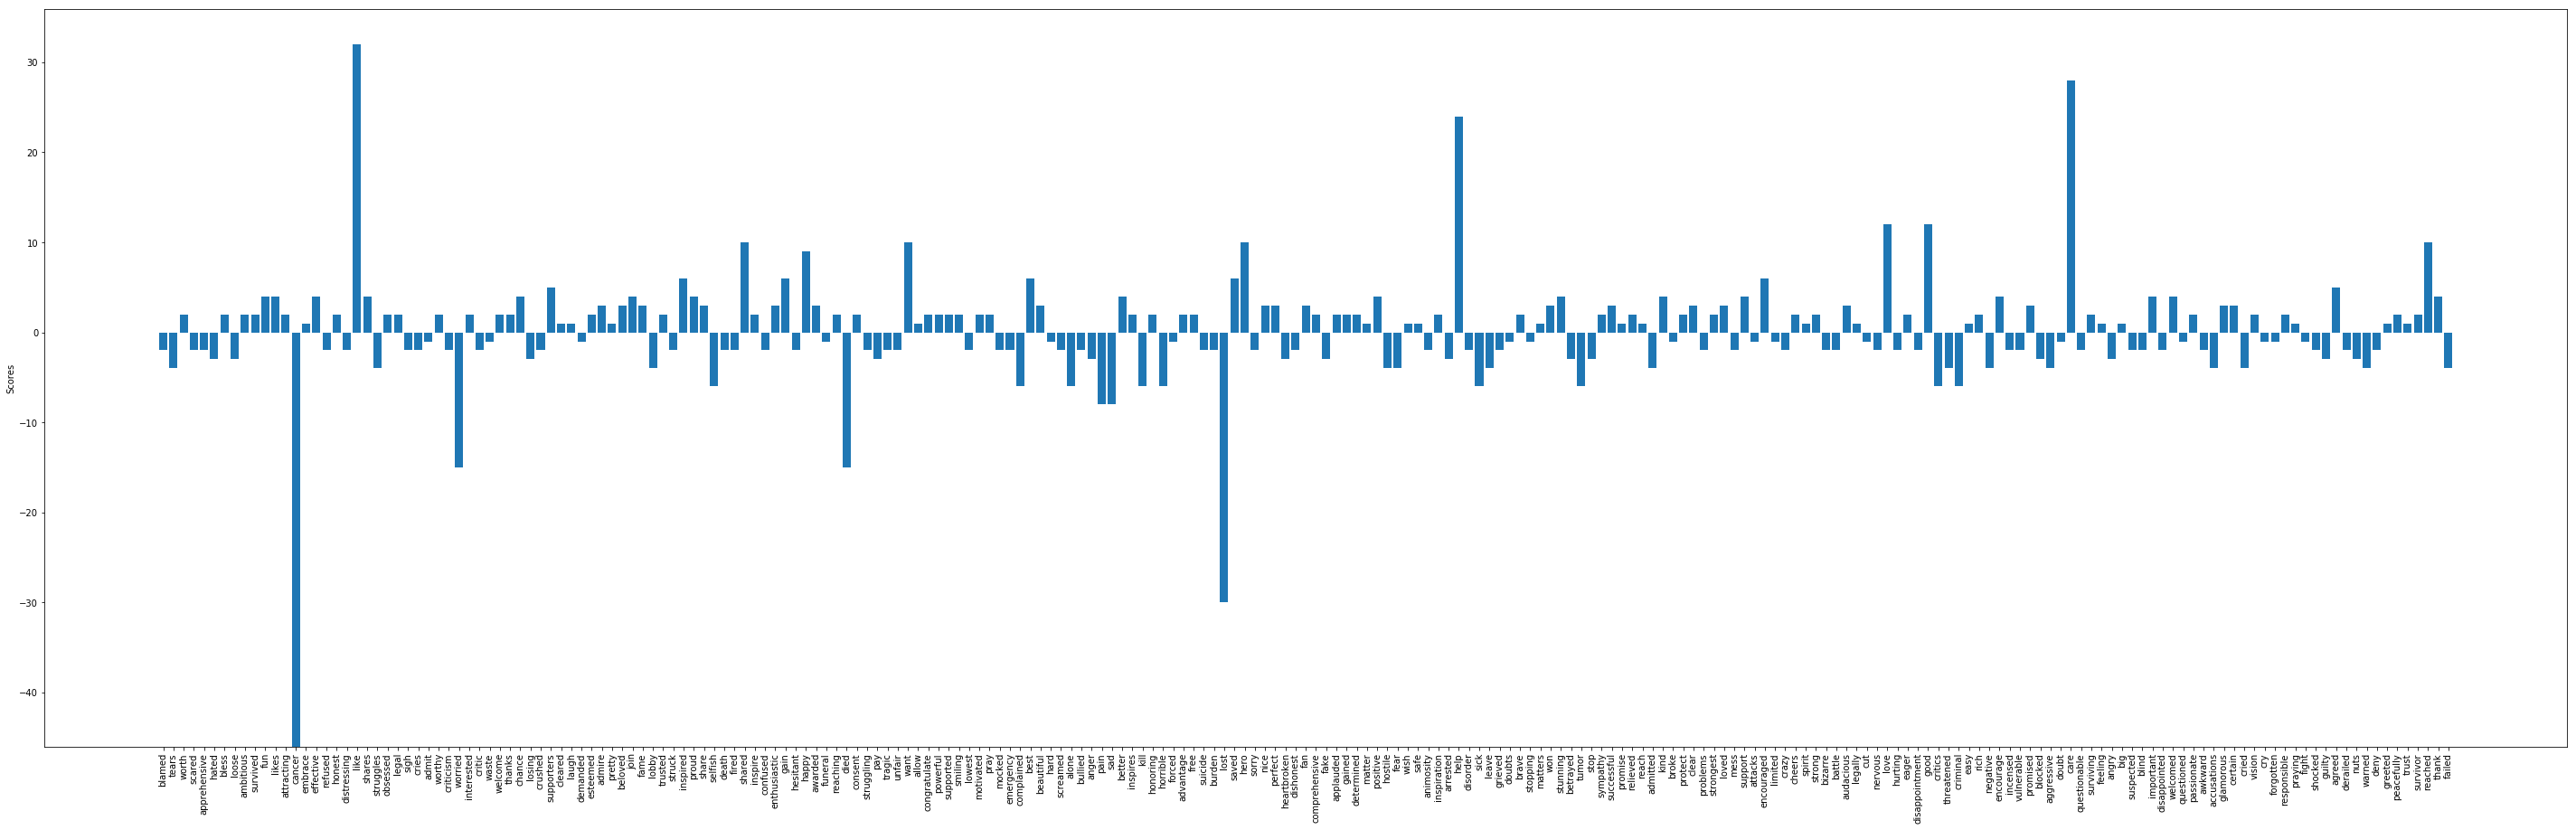

In [44]:
import matplotlib.pyplot as plt

D = wt_dict
fig, ax = plt.subplots()
plt.bar(range(len(D)), list(D.values()), align='center')

fig.set_size_inches(50, 15)
plt.xticks(range(len(D)), list(D.keys()),rotation='vertical')
plt.ylabel('Scores')
plt.savefig('cancer_story.png')
plt.show()

In [45]:
nltk.download("vader_lexicon")

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/harish/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [46]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer # imports WordNetLemmatizer
from nltk.corpus import wordnet as wn # imports Wordnet corpus
from nltk.corpus import sentiwordnet as swn # imports SentiWordNet

/usr/local/lib/python3.5/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [47]:
sid = SentimentIntensityAnalyzer() # calls SentimentIntensitAnalyzer function
for sentence in sentences: # for a sentence in a list of sentences
        display (sentence) #display sentence
        ss = sid.polarity_scores(sentence) #and assign a sentiment polarity score
        for k in sorted(ss):        
            display ('{0}: {1}, '.format(k, ss[k])) #format the output

'(CNN) Behind the double-mastectomy scars that run across her bare chest, she had a story to tell.So late last April, Paulette Leaphart embarked on a 1,000-mile walk from her childhood hometown of Biloxi, Mississippi, to the halls of Congress in Washington.And she did it topless.The breast cancer survivor screamed for a cure and demanded better and more affordable health care.'

'compound: 0.0679, '

'neg: 0.126, '

'neu: 0.745, '

'pos: 0.129, '

'She wanted women without breasts to believe in their beauty and be proud of their strength.'

'compound: 0.8779, '

'neg: 0.0, '

'neu: 0.563, '

'pos: 0.437, '

'By showcasing and embracing her scars, she hoped to inspire others to do the same.Her journey was bold, visual, moving.'

'compound: 0.836, '

'neg: 0.0, '

'neu: 0.656, '

'pos: 0.344, '

"It offered a hero to admire and, given Paulette's audacious decision to walk shirtless in the face of strangers, a rich spectacle to witness."

'compound: 0.9042, '

'neg: 0.0, '

'neu: 0.596, '

'pos: 0.404, '

'It spoke to African-American women, who face the highest breast cancer mortality rate.'

'compound: -0.6597, '

'neg: 0.268, '

'neu: 0.732, '

'pos: 0.0, '

'It inspired legions of survivors.'

'compound: 0.4939, '

'neg: 0.0, '

'neu: 0.556, '

'pos: 0.444, '

"And it spoke to many who'd lost someone to the disease.It seemed a storyteller's dream."

'compound: -0.0772, '

'neg: 0.141, '

'neu: 0.736, '

'pos: 0.123, '

"But reality would eventually intrude.Documentary filmmakers were first to seize on Paulette's potential -- after she approached a producer who was out on a shoot, lifted up her shirt and said her story needed to be told."

'compound: -0.34, '

'neg: 0.066, '

'neu: 0.934, '

'pos: 0.0, '

'A stunning trailer for "Scar Story," in which the film crew would follow her entire walk, was released in late October 2015.A Kickstarter campaign to help fund the film went up weeks before the walk began, attracting enthusiastic donors.'

'compound: 0.891, '

'neg: 0.0, '

'neu: 0.746, '

'pos: 0.254, '

'Journalists flocked to Paulette, eager to tell her story.'

'compound: 0.3612, '

'neg: 0.0, '

'neu: 0.762, '

'pos: 0.238, '

'Even megastar Beyoncé took notice and featured Paulette in "Lemonade.'

'compound: 0.0, '

'neg: 0.0, '

'neu: 1.0, '

'pos: 0.0, '

'"I saw the trailer on Facebook and, like so many others, was hooked.'

'compound: 0.3612, '

'neg: 0.0, '

'neu: 0.828, '

'pos: 0.172, '

'In a world hungry for heroes, whose stories of inspiration bring us light amid darkness, Paulette seemed to feed that craving.'

'compound: 0.6908, '

'neg: 0.078, '

'neu: 0.661, '

'pos: 0.261, '

"After making a few calls and learning she was walking with her 8-year-old daughter, no less, I hopped in my car, picked up my amateur photographer stepson, and headed to North Carolina to walk with her.Some stories land on a journalist's plate like manna from heaven."

'compound: 0.5574, '

'neg: 0.046, '

'neu: 0.833, '

'pos: 0.121, '

"They're perfect morsels you can't wait to share."

'compound: 0.4238, '

'neg: 0.163, '

'neu: 0.518, '

'pos: 0.319, '

'Others arrive a mess of ingredients with no recipe to follow.'

'compound: -0.5719, '

'neg: 0.37, '

'neu: 0.63, '

'pos: 0.0, '

'This one started the first way and finished the other.After walking with Paulette for a full day, I left with more questions than answers.'

'compound: 0.0, '

'neg: 0.0, '

'neu: 1.0, '

'pos: 0.0, '

"No matter how much I hated to admit it, aspects of her story simply didn't add up."

'compound: -0.6705, '

'neg: 0.3, '

'neu: 0.563, '

'pos: 0.136, '

'And the more I kept digging, the more inconsistencies I found: about her past and her cancer treatment, about how much she was actually walking, even about her motivations.Part of me wanted to walk away -- from Paulette and the story.'

'compound: -0.6597, '

'neg: 0.104, '

'neu: 0.896, '

'pos: 0.0, '

"If even one woman's life was saved thanks to a conversation Paulette started, wasn't that enough?"

'compound: 0.6908, '

'neg: 0.0, '

'neu: 0.695, '

'pos: 0.305, '

"So what if our hero was flawed?But then I thought about the thousands of people following Paulette on Facebook, all the journalists who covered her journey and the online video viewed more than 20 million times.And I realized: This story wasn't just about Paulette."

'compound: 0.5574, '

'neg: 0.0, '

'neu: 0.919, '

'pos: 0.081, '

"It's about our need to find -- and, for some of us, become -- heroes."

'compound: 0.5106, '

'neg: 0.0, '

'neu: 0.809, '

'pos: 0.191, '

"It's about the unchecked storytelling and self-promotion that thrives on social media."

'compound: 0.0, '

'neg: 0.0, '

'neu: 1.0, '

'pos: 0.0, '

"It's about the disappointment we feel when reality jolts us awake from our reverie.In our desperation to believe in people, do we dole out passes too easily?"

'compound: -0.5994, '

'neg: 0.193, '

'neu: 0.734, '

'pos: 0.073, '

'Had we, in our collective enchantment with Paulette, all become blind?Shameka Fulston, left, and others join Paulette Leaphart for a community walk in Charlotte.'

'compound: 0.296, '

'neg: 0.0, '

'neu: 0.909, '

'pos: 0.091, '

'Fulston planned to rejoin Paulette for the last 100 miles of her walk but left Charlotte feeling disenchanted.A vision from GodI caught up with Paulette at a house outside Charlotte, North Carolina, where she and her daughter were staying.'

'compound: 0.5023, '

'neg: 0.0, '

'neu: 0.894, '

'pos: 0.106, '

'The grill was fired up, food filled the counters and the music was pumping.'

'compound: -0.5574, '

'neg: 0.217, '

'neu: 0.783, '

'pos: 0.0, '

'Paulette, who wore a T-shirt emblazoned with the words "Living beautifully," greeted me with a hug.'

'compound: 0.6369, '

'neg: 0.0, '

'neu: 0.698, '

'pos: 0.302, '

'"The walk has given me back everything the devil stole from me," she told those in the room, as they gathered to pray for her journey.The hostess said she opened her home because she\'d lost her own sister to breast cancer.'

'compound: -0.8689, '

'neg: 0.22, '

'neu: 0.734, '

'pos: 0.046, '

'As her tears fell, she told Paulette, "That\'s why I wanted to take care of you.'

'compound: 0.3182, '

'neg: 0.105, '

'neu: 0.718, '

'pos: 0.177, '

'"Dusk turned to night, and I kept my eye on the time.'

'compound: 0.0, '

'neg: 0.0, '

'neu: 1.0, '

'pos: 0.0, '

'When we spoke by phone, Paulette had warned me she woke up at 4:30 each morning and walked 20 to 40 miles each day except weekends, which were for rest.'

'compound: -0.2732, '

'neg: 0.068, '

'neu: 0.932, '

'pos: 0.0, '

'She had to cover that sort of ground, she explained, if she wanted to meet her goal of reaching Washington by June 27, her 50th birthday.'

'compound: 0.2023, '

'neg: 0.0, '

'neu: 0.933, '

'pos: 0.067, '

"I'm in decent shape, but walking at least 20 miles on little sleep scared me."

'compound: -0.5319, '

'neg: 0.197, '

'neu: 0.803, '

'pos: 0.0, '

'"Oh, we\'re not starting \'til 9 a.m. tomorrow," Paulette finally told me as the night wore on.'

'compound: 0.0, '

'neg: 0.0, '

'neu: 1.0, '

'pos: 0.0, '

'A community walk was planned in downtown Charlotte.'

'compound: 0.0, '

'neg: 0.0, '

'neu: 1.0, '

'pos: 0.0, '

'I breathed a sigh of relief.The next morning, the crowd was passionate but small -- about three dozen women, men and children.'

'compound: 0.3071, '

'neg: 0.0, '

'neu: 0.847, '

'pos: 0.153, '

'Many wore pink , and most had been touched by breast cancer.'

'compound: -0.6597, '

'neg: 0.306, '

'neu: 0.694, '

'pos: 0.0, '

'"Five years in October," said one woman.'

'compound: 0.0, '

'neg: 0.0, '

'neu: 1.0, '

'pos: 0.0, '

'"Nine years cancer-free," said another, sporting a "Fight Like a Girl" T-shirt.'

'compound: -0.0258, '

'neg: 0.198, '

'neu: 0.611, '

'pos: 0.191, '

'"Mom died in 2004," said one man, who survived lymphoma himself.A woman who\'d driven through the night to be here took off her shirt to reveal her own tangled scars.'

'compound: -0.0772, '

'neg: 0.103, '

'neu: 0.802, '

'pos: 0.095, '

"She'd seen Paulette in Atlanta and vowed to walk with her.After photos, videos and prayers, the walkers hit the pavement, weaving their way through downtown."

'compound: 0.0, '

'neg: 0.0, '

'neu: 1.0, '

'pos: 0.0, '

'"We need a cure!'

'compound: 0.0, '

'neg: 0.0, '

'neu: 1.0, '

'pos: 0.0, '

'We need a cure!"'

'compound: 0.0, '

'neg: 0.0, '

'neu: 1.0, '

'pos: 0.0, '

"they screamed, following Paulette's lead."

'compound: -0.3182, '

'neg: 0.365, '

'neu: 0.635, '

'pos: 0.0, '

'"Breast cancer sucks!'

'compound: -0.8016, '

'neg: 0.878, '

'neu: 0.122, '

'pos: 0.0, '

'Breast cancer sucks!"'

'compound: -0.69, '

'neg: 0.701, '

'neu: 0.299, '

'pos: 0.0, '

'They also sang hymns.'

'compound: 0.0, '

'neg: 0.0, '

'neu: 1.0, '

'pos: 0.0, '

'"We will walk until we defeat this demon!"'

'compound: -0.5093, '

'neg: 0.32, '

'neu: 0.68, '

'pos: 0.0, '

"Paulette yelled.All the pain I felt from the day I was born had purpose, and I'm living that purpose."

'compound: -0.5106, '

'neg: 0.171, '

'neu: 0.829, '

'pos: 0.0, '

"God said I'm going to use your chest."

'compound: 0.2732, '

'neg: 0.0, '

'neu: 0.769, '

'pos: 0.231, '

'Paulette LeaphartIt was Memorial Day, one month to the day since she started, and the streets were quiet.'

'compound: 0.0, '

'neg: 0.0, '

'neu: 1.0, '

'pos: 0.0, '

'Occasional onlookers gawked, wondering what the commotion was about.'

'compound: 0.0, '

'neg: 0.0, '

'neu: 1.0, '

'pos: 0.0, '

'I walked along taking notes and wondered myself: How effective was this small, 1-mile march, really?I was more interested in what would come next: the walk she was resuming with her daughter to reach Washington in less than a month.They had already covered 710 miles.'

'compound: 0.7346, '

'neg: 0.0, '

'neu: 0.848, '

'pos: 0.152, '

"They'd walked all but 100 of them, Paulette said."

'compound: 0.0, '

'neg: 0.0, '

'neu: 1.0, '

'pos: 0.0, '

'She said she often used cabs to carry her through dangerous parts of the journey.'

'compound: -0.4767, '

'neg: 0.181, '

'neu: 0.819, '

'pos: 0.0, '

"With most weekends off, that would mean they'd averaged more than 27 miles a day on foot.We got started around noon."

'compound: 0.0, '

'neg: 0.0, '

'neu: 1.0, '

'pos: 0.0, '

"I'd pictured us rambling through rolling hills of green."

'compound: 0.0, '

'neg: 0.0, '

'neu: 1.0, '

'pos: 0.0, '

'Paulette would be like Forrest Gump, I thought, gathering disciples as she strode through quaint towns.Paulette preferred a busier route and steered us toward US 29.'

'compound: 0.3612, '

'neg: 0.0, '

'neu: 0.902, '

'pos: 0.098, '

'In her mind it was safer, and only along highways could she and her message be seen.'

'compound: 0.4215, '

'neg: 0.0, '

'neu: 0.851, '

'pos: 0.149, '

'She carried no sign, insisting the scars told her story.To her 5,000 friends and thousands more followers on Facebook, Paulette was already a hero.'

'compound: 0.6705, '

'neg: 0.076, '

'neu: 0.692, '

'pos: 0.232, '

'They showered her with love and praise.'

'compound: 0.8316, '

'neg: 0.0, '

'neu: 0.391, '

'pos: 0.609, '

'"If I had 10,000 thousand tongues, I couldn\'t thank you enough," one person wrote the day after I walked with her.'

'compound: -0.2755, '

'neg: 0.11, '

'neu: 0.89, '

'pos: 0.0, '

'"I understand your fight!'

'compound: -0.4389, '

'neg: 0.491, '

'neu: 0.509, '

'pos: 0.0, '

'God is with you every step of the way.'

'compound: 0.2732, '

'neg: 0.0, '

'neu: 0.792, '

'pos: 0.208, '

'""I love you for what you are doing," wrote another.'

'compound: 0.6369, '

'neg: 0.0, '

'neu: 0.682, '

'pos: 0.318, '

'"You are so brave you are my WOMAN OF THE YEAR.'

'compound: 0.656, '

'neg: 0.0, '

'neu: 0.696, '

'pos: 0.304, '

'""You are such a phenomenal woman," wrote a third.'

'compound: 0.0, '

'neg: 0.0, '

'neu: 1.0, '

'pos: 0.0, '

'"I lost my mother to breast cancer but I know if she were alive, she would be walking with you -- the whole way.'

'compound: 0.0129, '

'neg: 0.157, '

'neu: 0.721, '

'pos: 0.123, '

'... God bless you.'

'compound: 0.5994, '

'neg: 0.0, '

'neu: 0.29, '

'pos: 0.71, '

'"Paulette has inspired women all over the world and said she has even saved lives.'

'compound: 0.7184, '

'neg: 0.0, '

'neu: 0.684, '

'pos: 0.316, '

"People who'd been considering suicide, she said, were motivated by her to go on.The global attention began two years earlier, when, over Labor Day weekend, she posted topless photos of herself on a beach in Mississippi."

'compound: -0.3612, '

'neg: 0.111, '

'neu: 0.815, '

'pos: 0.074, '

"She had just emerged from eight months of depression after losing her breasts and being told she couldn't have reconstructive surgery because of a pre-existing blood-clotting disorder."

'compound: -0.8402, '

'neg: 0.281, '

'neu: 0.719, '

'pos: 0.0, '

'She says she had a vision from God to go to Biloxi Beach, take off her shirt and be photographed.She said people surrounded her.'

'compound: 0.4767, '

'neg: 0.0, '

'neu: 0.837, '

'pos: 0.163, '

'A woman began to cry and then she did, too.'

'compound: -0.4767, '

'neg: 0.279, '

'neu: 0.721, '

'pos: 0.0, '

'Onlookers applauded.'

'compound: 0.3612, '

'neg: 0.0, '

'neu: 0.286, '

'pos: 0.714, '

'Paulette freed herself in that moment and, in posting photos on Facebook, did the same for others.'

'compound: 0.4019, '

'neg: 0.0, '

'neu: 0.856, '

'pos: 0.144, '

'She said a man wrote to thank her, saying that his wife, who\'d lost her breasts years before, had finally bared her chest for him.She was chosen by God to be a vessel for his work, she said, and her photos were "liked" almost 300,000 times.'

'compound: 0.3182, '

'neg: 0.048, '

'neu: 0.856, '

'pos: 0.096, '

'It was God who woke her up one night in December 2013 to tell her she had breast cancer, which doctors later confirmed.'

'compound: -0.5106, '

'neg: 0.16, '

'neu: 0.764, '

'pos: 0.076, '

'And it was God who told her to go on this 1,000-mile topless walk.'

'compound: 0.2732, '

'neg: 0.0, '

'neu: 0.861, '

'pos: 0.139, '

'"All the pain I felt from the day I was born had purpose, and I\'m living that purpose," she said.'

'compound: -0.5106, '

'neg: 0.163, '

'neu: 0.837, '

'pos: 0.0, '

'"God said I\'m going to use your chest.'

'compound: 0.2732, '

'neg: 0.0, '

'neu: 0.769, '

'pos: 0.231, '

'"Pushing her daughter in a weighed-down stroller, Paulette Leaphart winds her way out of downtown Charlotte to continue her journey toward Washington.The first signsBased on the expressions of the people we passed, not everyone saw the purpose.'

'compound: 0.0, '

'neg: 0.0, '

'neu: 1.0, '

'pos: 0.0, '

'She joked that she must look like a bag lady to some.'

'compound: 0.5859, '

'neg: 0.0, '

'neu: 0.652, '

'pos: 0.348, '

'Others got what this was about and offered her cheers and hugs.'

'compound: 0.743, '

'neg: 0.0, '

'neu: 0.613, '

'pos: 0.387, '

'A church group giving out toiletries to homeless people gathered her in a circle for prayers.'

'compound: 0.34, '

'neg: 0.0, '

'neu: 0.844, '

'pos: 0.156, '

"Two women on bikes who'd seen her story rode up and passed her $20 bills.Paulette had said she only ate fruit when she walked."

'compound: 0.0, '

'neg: 0.0, '

'neu: 1.0, '

'pos: 0.0, '

'On this day, though, she ate fried chicken tenders from Popeyes and two hot dogs at Cook Out, a Southern fast-food chain.'

'compound: 0.1531, '

'neg: 0.0, '

'neu: 0.926, '

'pos: 0.074, '

"I wasn't judging her choices; I matched everything she ate and then some."

'compound: 0.0, '

'neg: 0.0, '

'neu: 1.0, '

'pos: 0.0, '

"But she didn't eat the apple I offered, and I never saw her eat a piece of fruit.It was one of those tiny, perhaps silly, observations I filed away."

'compound: 0.0258, '

'neg: 0.0, '

'neu: 0.956, '

'pos: 0.044, '

"But aren't we all guilty of saying and doing different things, especially when it comes to diet?The heat had slowed her down."

'compound: 0.3252, '

'neg: 0.0, '

'neu: 0.9, '

'pos: 0.1, '

'She said she was now aiming for 20 miles a day, news that came as a relief.'

'compound: 0.4767, '

'neg: 0.0, '

'neu: 0.819, '

'pos: 0.181, '

"It was late afternoon, though, and we hadn't even gone 10 miles."

'compound: 0.0, '

'neg: 0.0, '

'neu: 1.0, '

'pos: 0.0, '

'Sometimes her daughter trudged along with us.'

'compound: 0.0, '

'neg: 0.0, '

'neu: 1.0, '

'pos: 0.0, '

'More often, she climbed into a stroller built for kids less than half her size.'

'compound: 0.0, '

'neg: 0.0, '

'neu: 1.0, '

'pos: 0.0, '

'Bags spilled over the sides; one balanced across her lap.'

'compound: 0.0, '

'neg: 0.0, '

'neu: 1.0, '

'pos: 0.0, '

'Several times the awkward contraption tumbled over when she was getting in or out.While picking up her scattered belongings -- an overstuffed wallet, sunscreen and bug spray, water bottles and her daughter\'s "Jesus Storybook Bible" -- Paulette told me she\'d already lost her driver\'s license and passport.'

'compound: -0.4404, '

'neg: 0.08, '

'neu: 0.92, '

'pos: 0.0, '

'"How do you check into hotels?"'

'compound: 0.0, '

'neg: 0.0, '

'neu: 1.0, '

'pos: 0.0, '

'I asked, knowing desk clerks always ask for ID.'

'compound: 0.0, '

'neg: 0.0, '

'neu: 1.0, '

'pos: 0.0, '

'"Everyone knows who I am," she answered with a smile.'

'compound: 0.3612, '

'neg: 0.0, '

'neu: 0.737, '

'pos: 0.263, '

'I made another mental note.The highway we walked along grew busy.'

'compound: 0.0, '

'neg: 0.0, '

'neu: 1.0, '

'pos: 0.0, '

"When Paulette's daughter was out of the stroller, I often caught myself holding my breath as cars whizzed by.In the hottest part of the day, she took breaks."

'compound: 0.0, '

'neg: 0.0, '

'neu: 1.0, '

'pos: 0.0, '

'Sometimes, she said, she and her daughter studied.'

'compound: 0.0, '

'neg: 0.0, '

'neu: 1.0, '

'pos: 0.0, '

'Other times, they found a place to swim, catch a movie or visit a garden.'

'compound: 0.0, '

'neg: 0.0, '

'neu: 1.0, '

'pos: 0.0, '

'On the day I walked with her, we went bowling.Paulette was on her phone often and obsessed with charging it wherever we stopped.'

'compound: -0.3818, '

'neg: 0.153, '

'neu: 0.847, '

'pos: 0.0, '

"She wasn't making calls as much as checking Facebook."

'compound: 0.0, '

'neg: 0.0, '

'neu: 1.0, '

'pos: 0.0, '

'She seemed consumed with monitoring likes, shares and comments.'

'compound: 0.6124, '

'neg: 0.0, '

'neu: 0.583, '

'pos: 0.417, '

"I asked if anyone on the Internet ever put her down.Only one, she said: a woman she didn't know who was spreading lies and had a criminal record."

'compound: -0.7351, '

'neg: 0.212, '

'neu: 0.788, '

'pos: 0.0, '

'A woman she suspected was crazy and jealous.'

'compound: -0.743, '

'neg: 0.646, '

'neu: 0.354, '

'pos: 0.0, '

"A woman she was determined to ignore.What about the documentary group who'd set out to follow her?"

'compound: 0.34, '

'neg: 0.0, '

'neu: 0.862, '

'pos: 0.138, '

'What had happened to them?'

'compound: 0.0, '

'neg: 0.0, '

'neu: 1.0, '

'pos: 0.0, '

'Paulette told me they\'d made money off her story without her consent and left after just a few days, abandoning her and her daughter "like dogs on the side of the road.'

'compound: -0.194, '

'neg: 0.123, '

'neu: 0.805, '

'pos: 0.072, '

'"Paulette often described her undertaking as "a walk of faith" and said Jesus has always been with her.'

'compound: 0.4215, '

'neg: 0.0, '

'neu: 0.859, '

'pos: 0.141, '

'When she was a small child, she said, she was sexually, physically and emotionally abused.'

'compound: -0.5106, '

'neg: 0.202, '

'neu: 0.798, '

'pos: 0.0, '

'Her great-grandmother gave her a Bible.'

'compound: 0.0, '

'neg: 0.0, '

'neu: 1.0, '

'pos: 0.0, '

'She said it was the first book she ever read.'

'compound: 0.0, '

'neg: 0.0, '

'neu: 1.0, '

'pos: 0.0, '

'"She couldn\'t protect me, but she gave me something that would.'

'compound: -0.1511, '

'neg: 0.137, '

'neu: 0.863, '

'pos: 0.0, '

'"After one particularly brutal beating, Paulette said, she promised God that if he let her live, she\'d dedicate her life to taking care of children.'

'compound: -0.2195, '

'neg: 0.216, '

'neu: 0.564, '

'pos: 0.22, '

'She has eight; she said she gave birth to four and adopted four others.'

'compound: 0.0, '

'neg: 0.0, '

'neu: 1.0, '

'pos: 0.0, '

"Over the years, she said, she's fostered hundreds more.Her older kids were caring for her teens during the walk, she said."

'compound: 0.4939, '

'neg: 0.0, '

'neu: 0.862, '

'pos: 0.138, '

'Her youngest, whom she said she home schools, refused to be left behind.'

'compound: -0.296, '

'neg: 0.155, '

'neu: 0.845, '

'pos: 0.0, '

'When Paulette was at her lowest point fighting cancer, she said, her daughter pushed her to battle on.'

'compound: -0.9022, '

'neg: 0.464, '

'neu: 0.536, '

'pos: 0.0, '

'"There were days I wanted to stop breathing.'

'compound: -0.296, '

'neg: 0.268, '

'neu: 0.732, '

'pos: 0.0, '

"She'd climb up into my bed and love all over me."

'compound: 0.6369, '

'neg: 0.0, '

'neu: 0.704, '

'pos: 0.296, '

"She'd say, 'Mama, promise me you're going to beat cancer.'"

'compound: 0.3182, '

'neg: 0.0, '

'neu: 0.796, '

'pos: 0.204, '

'I promised her and I kept it.'

'compound: 0.3612, '

'neg: 0.0, '

'neu: 0.615, '

'pos: 0.385, '

'"The highway we walked along grew busy.'

'compound: 0.0, '

'neg: 0.0, '

'neu: 1.0, '

'pos: 0.0, '

"When Paulette's daughter was out of the stroller, I often caught myself holding my breath as cars whizzed by."

'compound: 0.0, '

'neg: 0.0, '

'neu: 1.0, '

'pos: 0.0, '

'When the shoulder narrowed, Paulette simply walked on the road.'

'compound: 0.0, '

'neg: 0.0, '

'neu: 1.0, '

'pos: 0.0, '

'"I force them to respect me.'

'compound: 0.4767, '

'neg: 0.0, '

'neu: 0.617, '

'pos: 0.383, '

'"Fear, she insisted, was nothing more than the devil.'

'compound: -0.6872, '

'neg: 0.368, '

'neu: 0.632, '

'pos: 0.0, '

'She said God would protect her and her daughter.'

'compound: 0.5719, '

'neg: 0.0, '

'neu: 0.598, '

'pos: 0.402, '

'I hoped God would also remember me.Salvation came for us in the form of a flat stroller tire.'

'compound: 0.5719, '

'neg: 0.0, '

'neu: 0.749, '

'pos: 0.251, '

'The weighed down contraption now moved like lead.Paulette had asked for help pushing it throughout the day, and I was happy to oblige in spurts.'

'compound: 0.836, '

'neg: 0.0, '

'neu: 0.702, '

'pos: 0.298, '

"But now, unless she could fix it, this day looked done.An auto shop tried to help but couldn't."

'compound: 0.2144, '

'neg: 0.0, '

'neu: 0.902, '

'pos: 0.098, '

'A taxi ride took us to the other side of an interstate.I left her at Cook Out and took an Uber back to my car.'

'compound: 0.0, '

'neg: 0.0, '

'neu: 1.0, '

'pos: 0.0, '

"She planned to wait with her daughter for a ride back to the house where she'd been staying."

'compound: 0.0, '

'neg: 0.0, '

'neu: 1.0, '

'pos: 0.0, '

'She had miles to make up, she said, and needed to get to Walmart to buy a new stroller so she could pick up where she left off first thing in the morning.Our day ended as the sun began to set.'

'compound: 0.0, '

'neg: 0.0, '

'neu: 1.0, '

'pos: 0.0, '

'We\'d logged less than 14 miles.The "Scar Story" trailer was widely shared on social media and gained the attention of journalists, as well as Beyoncé, who featured Paulette in "Lemonade.'

'compound: 0.7269, '

'neg: 0.0, '

'neu: 0.792, '

'pos: 0.208, '

'"Paulette\'s financial woesAs more local, national and international reporters told Paulette\'s story, my reservations mounted.One local TV reporter wrote online that Beyoncé had walked with Paulette, though it was later trimmed from the piece.'

'compound: 0.0, '

'neg: 0.0, '

'neu: 1.0, '

'pos: 0.0, '

"Another referred to her as a social worker, a career that, up until this point, she hadn't mentioned to me."

'compound: 0.0, '

'neg: 0.0, '

'neu: 1.0, '

'pos: 0.0, '

"When I'd asked Paulette what kind of work she'd done, she only mentioned owning a successful day care center in Virginia -- which, she said, she'd sold years before for a profit."

'compound: 0.872, '

'neg: 0.0, '

'neu: 0.732, '

'pos: 0.268, '

'She became homeless, she said, when medical expenses mounted from two years of cancer treatment.'

'compound: -0.6597, '

'neg: 0.239, '

'neu: 0.761, '

'pos: 0.0, '

'She had to choose between having a roof over her head or fighting to get well.I wondered how many of these journalists actually spent a full day with her; besides the filmmakers, Paulette had told me I was the first.'

'compound: -0.3612, '

'neg: 0.065, '

'neu: 0.935, '

'pos: 0.0, '

"Was I a horrible person for not buying her story wholesale?I know we're all vulnerable in this time of Internet hoaxes and fake news."

'compound: -0.8176, '

'neg: 0.309, '

'neu: 0.691, '

'pos: 0.0, '

'Remember the recent story of a Santa Claus in Tennessee who claimed an ailing 5-year-old boy died in his arms?'

'compound: -0.5574, '

'neg: 0.167, '

'neu: 0.833, '

'pos: 0.0, '

"The world went nuts over this tearjerker, the story went viral, and none of it was publicly corroborated by anyone other than Santa.I got teary-eyed when I saw Santa's story, and when I first learned about Paulette's I was similarly taken."

'compound: -0.3182, '

'neg: 0.059, '

'neu: 0.941, '

'pos: 0.0, '

"It's who I am as a person; I want to believe."

'compound: 0.0772, '

'neg: 0.0, '

'neu: 0.843, '

'pos: 0.157, '

'But as a journalist my job is to ask questions and pull on those loose threads of doubt.'

'compound: -0.5859, '

'neg: 0.242, '

'neu: 0.758, '

'pos: 0.0, '

"So I enlisted a CNN researcher to pull up a background report on Paulette.That's when her story began to unravel.She found a way for people to feel sorry for her, a way to collect money and notoriety."

'compound: -0.0772, '

'neg: 0.04, '

'neu: 0.96, '

'pos: 0.0, '

'Barbara Smith, who won part of a $100,000 judgment against PauletteIt turns out her financial struggles long predated cancer.'

'compound: -0.4939, '

'neg: 0.27, '

'neu: 0.586, '

'pos: 0.145, '

"Years before Paulette said God woke her up to say she had breast cancer, there'd been more than a half dozen civil judgments and liens against her totaling well over $100,000."

'compound: -0.296, '

'neg: 0.124, '

'neu: 0.758, '

'pos: 0.118, '

"She'd filed for bankruptcy, owed the IRS about $45,000 and had faced multiple evictions.The bulk of the civil judgments stemmed from the Virginia day care center, which Paulette had owned for less than two years."

'compound: 0.4939, '

'neg: 0.0, '

'neu: 0.914, '

'pos: 0.086, '

'I spoke to Barbara Smith, who said she and a friend were bilked out of more than $60,000 after Paulette persuaded them to invest in the day care center and become her partners.'

'compound: 0.7506, '

'neg: 0.0, '

'neu: 0.819, '

'pos: 0.181, '

'They agreed that Smith and the friend, who knew Paulette from church, would later take over the business from Paulette, which she had valued at $200,000.'

'compound: 0.802, '

'neg: 0.0, '

'neu: 0.737, '

'pos: 0.263, '

"But she'd been dishonest about the state of her day care center, was in the hole and hadn't even been paying rent on the building, Smith said."

'compound: -0.128, '

'neg: 0.116, '

'neu: 0.784, '

'pos: 0.1, '

'The pair lost everything they gave Paulette.'

'compound: -0.3182, '

'neg: 0.277, '

'neu: 0.723, '

'pos: 0.0, '

'"We were investing in something that wasn\'t even there," said Smith, who admitted they were too trusting.'

'compound: 0.4767, '

'neg: 0.0, '

'neu: 0.785, '

'pos: 0.215, '

'"She just kind of shrugged it off as if we knew what we were getting into.'

'compound: 0.0, '

'neg: 0.0, '

'neu: 1.0, '

'pos: 0.0, '

'"Court documents show that Paulette had defaulted on her lease and had "fraudulently represented" the worth of her business.'

'compound: 0.2263, '

'neg: 0.0, '

'neu: 0.905, '

'pos: 0.095, '

'Paulette "declined to cooperate with her counsel and failed to appear for trial," the court order read.The plaintiffs were awarded more than $100,000, but they "never saw a red cent," Smith said.'

'compound: -0.0772, '

'neg: 0.065, '

'neu: 0.879, '

'pos: 0.056, '

"Paulette filed for bankruptcy a few days later.When media reports about Paulette's 1,000-mile walk began appearing, Smith said she and her friend were only temporarily surprised."

'compound: 0.6249, '

'neg: 0.0, '

'neu: 0.819, '

'pos: 0.181, '

'Knowing her the way they did, this was just another "newfangled idea of how to get money," Smith said.'

'compound: 0.0, '

'neg: 0.0, '

'neu: 1.0, '

'pos: 0.0, '

'"She found a way for people to feel sorry for her, a way to collect money and notoriety.'

'compound: -0.0772, '

'neg: 0.08, '

'neu: 0.92, '

'pos: 0.0, '

'"Paulette Leaphart captured the attention of young documentary filmmakers when she approached a producer, lifted up her shirt and said her story needed to be told.A day with BeyoncéIt became clear, as I ambled along with her, that Paulette possessed an inflated sense of her fame.She told me she imagined having her own reality TV show and a movie deal by the time her walk was over.'

'compound: 0.3818, '

'neg: 0.0, '

'neu: 0.96, '

'pos: 0.04, '

'She envisioned a career doing motivational speaking across the globe.She spoke about Beyoncé as if they were friends and said the star had spent a whole day alone with her on the set of "Lemonade."'

'compound: 0.2732, '

'neg: 0.055, '

'neu: 0.859, '

'pos: 0.086, '

'She said Beyoncé wanted her daughter, Blue Ivy, to look up to women like her.'

'compound: 0.3612, '

'neg: 0.0, '

'neu: 0.848, '

'pos: 0.152, '

"She said Beyoncé had promised to walk with her for a mile.I reached out a number of times to Beyoncé's publicist to ask about their relationship but never got a response.Paulette predicted that by the time she arrived in Washington, thousands of women would join her."

'compound: 0.5994, '

'neg: 0.0, '

'neu: 0.85, '

'pos: 0.15, '

"She said she'd been invited to walk in places as far-flung as Kenya and Jamaica and that she was a hero in Israel.These seemingly over-the-top statements only made me question her further.I knew she was struggling, and I worried about her."

'compound: -0.1027, '

'neg: 0.112, '

'neu: 0.807, '

'pos: 0.081, '

"... Part of me wanted to close the book on this story, leave it unwritten and move on.I followed her daily on Facebook to see where she was and what she'd do or say next."

'compound: -0.0516, '

'neg: 0.034, '

'neu: 0.966, '

'pos: 0.0, '

'Five days after I left her, she posted a picture of the stroller with the flat tire.'

'compound: 0.0, '

'neg: 0.0, '

'neu: 1.0, '

'pos: 0.0, '

"The next day she posted a picture I'd seen her take with a man outside Charlotte."

'compound: 0.0, '

'neg: 0.0, '

'neu: 1.0, '

'pos: 0.0, '

"She was supposed to be nearing Durham at this point, around 150 miles away from where we said goodbye, and I couldn't help but wonder why she was still sharing shots from nearly a week earlier."

'compound: 0.4715, '

'neg: 0.044, '

'neu: 0.857, '

'pos: 0.099, '

'I learned that she stayed in the house where I met her for five nights total -- two after we parted ways.'

'compound: 0.0, '

'neg: 0.0, '

'neu: 1.0, '

'pos: 0.0, '

'After that, she seemed to take as many days off as she walked.She visited with relatives and girlfriends and frolicked on a beach.'

'compound: 0.0, '

'neg: 0.0, '

'neu: 1.0, '

'pos: 0.0, '

'She fell sick and rested.'

'compound: -0.5106, '

'neg: 0.452, '

'neu: 0.548, '

'pos: 0.0, '

'She phoned to tell me about circulation problems in her feet and cried about being bullied online.'

'compound: -0.8555, '

'neg: 0.402, '

'neu: 0.598, '

'pos: 0.0, '

"She put her walk on hold to travel up to Washington to attend The United State of Women Summit, hosted by first lady Michelle Obama and Oprah Winfrey, but didn't stay."

'compound: 0.2263, '

'neg: 0.0, '

'neu: 0.94, '

'pos: 0.06, '

'The next day she posted photos of herself in a hospital bed, saying she was dehydrated.I knew she was struggling, and I worried about her.'

'compound: -0.6124, '

'neg: 0.192, '

'neu: 0.808, '

'pos: 0.0, '

"I suspected the attention had derailed her initial mission, that she'd gotten in deeper than she could handle."

'compound: -0.5106, '

'neg: 0.223, '

'neu: 0.777, '

'pos: 0.0, '

'I wondered if she was surrounded by people who no longer cared about her best interests.'

'compound: 0.7783, '

'neg: 0.099, '

'neu: 0.495, '

'pos: 0.405, '

'I feared there might be something bigger going on with her, that she might have other issues.'

'compound: -0.4939, '

'neg: 0.176, '

'neu: 0.824, '

'pos: 0.0, '

'Part of me wanted to close the book on this story, leave it unwritten and move on.'

'compound: -0.0516, '

'neg: 0.07, '

'neu: 0.93, '

'pos: 0.0, '

'Her journey now felt tragic and sad.'

'compound: -0.7269, '

'neg: 0.55, '

'neu: 0.45, '

'pos: 0.0, '

'What purpose would outing her discrepancies serve?But I kept reminding myself Paulette put herself in the spotlight.'

'compound: 0.0, '

'neg: 0.0, '

'neu: 1.0, '

'pos: 0.0, '

'Millions of people subscribed to her story, including plenty of journalists.'

'compound: 0.0, '

'neg: 0.0, '

'neu: 1.0, '

'pos: 0.0, '

'Beyond notoriety, what else was she after?'

'compound: 0.0, '

'neg: 0.0, '

'neu: 1.0, '

'pos: 0.0, '

'How was she affecting others?'

'compound: 0.0, '

'neg: 0.0, '

'neu: 1.0, '

'pos: 0.0, '

'Maybe there was something to gain from digging deeper -- for all of us.The trailer for "Scar Story," a proposed documentary about Paulette Leaphart\'s 1,000-mile walk, was filmed in New Orleans, where Paulette lives.Looking for directionPart of what kept me going was what I learned about the documentary.The filmmakers told me they\'d spent seven months preparing for this venture.'

'compound: 0.5267, '

'neg: 0.0, '

'neu: 0.943, '

'pos: 0.057, '

"They said Paulette had signed off on the trailer and Kickstarter page and had been told time and again that the film crew's intention was to simply document her journey.They thought they'd made it clear to Paulette that she would be responsible for her personal arrangements, logistics, support system and finances."

'compound: 0.765, '

'neg: 0.0, '

'neu: 0.863, '

'pos: 0.137, '

'As the departure date approached, they said, they kept checking to make sure her plans were on schedule.'

'compound: 0.3182, '

'neg: 0.0, '

'neu: 0.881, '

'pos: 0.119, '

'Paulette assured them she was ready.The day they set out, the filmmakers learned that her plan was to lean on them.'

'compound: 0.3612, '

'neg: 0.0, '

'neu: 0.889, '

'pos: 0.111, '

'Director Emily MacKenzie said Paulette turned to her and asked, "Which way should I go?'

'compound: 0.0, '

'neg: 0.0, '

'neu: 1.0, '

'pos: 0.0, '

'""My heart sank," MacKenzie told me.'

'compound: 0.0, '

'neg: 0.0, '

'neu: 1.0, '

'pos: 0.0, '

'"In that moment when she said that, I felt betrayed and deeply worried.'

'compound: -0.7574, '

'neg: 0.394, '

'neu: 0.606, '

'pos: 0.0, '

'"Paulette also insisted on bringing her daughter.'

'compound: 0.0, '

'neg: 0.0, '

'neu: 1.0, '

'pos: 0.0, '

'The filmmakers had expressed concerns about this in earlier conversations.'

'compound: 0.0, '

'neg: 0.0, '

'neu: 1.0, '

'pos: 0.0, '

'How would Paulette walk and care for her at the same time?'

'compound: 0.4939, '

'neg: 0.0, '

'neu: 0.775, '

'pos: 0.225, '

"She insisted she could handle it.They agreed to help out in small ways; they'd gladly walk Paulette's daughter to the bathroom or make her a sandwich."

'compound: 0.7351, '

'neg: 0.0, '

'neu: 0.753, '

'pos: 0.247, '

"But once the walk began, they said, Paulette wanted them to take on far more responsibility for her daughter than they'd discussed or agreed to -- and when they resisted, she grew furious.They had a film to make and couldn't be liable for the welfare of a child, they told her.I am sad to report that while we were with her on the road, the environment became hostile and unsafe for my team."

'compound: -0.5574, '

'neg: 0.075, '

'neu: 0.897, '

'pos: 0.028, '

'Filmmaker Emily MacKenzieEverything about the walk now made them nervous.'

'compound: -0.2732, '

'neg: 0.189, '

'neu: 0.811, '

'pos: 0.0, '

"Paulette got horrible blisters, even though she said she'd been training for more than a year."

'compound: -0.5423, '

'neg: 0.2, '

'neu: 0.8, '

'pos: 0.0, '

"(Her explanation, on Facebook, was that she'd only trained on flat ground.)"

'compound: 0.0, '

'neg: 0.0, '

'neu: 1.0, '

'pos: 0.0, '

'They spent three days with her -- covering 17, 11 and 9 miles -- and all signs pointed to disaster.'

'compound: -0.6249, '

'neg: 0.186, '

'neu: 0.814, '

'pos: 0.0, '

'Paulette blamed them for not being prepared.'

'compound: -0.5812, '

'neg: 0.488, '

'neu: 0.512, '

'pos: 0.0, '

"They'd put their lives on hold for a year for this project and were crushed, but felt they had no choice but to walk away.They worried about Paulette and her daughter, though."

'compound: -0.7579, '

'neg: 0.211, '

'neu: 0.789, '

'pos: 0.0, '

'They said they offered to drive them home to New Orleans, where Paulette lives, or at least take her daughter to relatives.'

'compound: 0.0, '

'neg: 0.0, '

'neu: 1.0, '

'pos: 0.0, '

"They were in contact with one of Paulette's cousins, who was also concerned."

'compound: 0.0, '

'neg: 0.0, '

'neu: 1.0, '

'pos: 0.0, '

"They only left when they were assured loved ones were on the way.Soon after their paths diverged, they said, Paulette's mileage seemed to quadruple."

'compound: 0.7506, '

'neg: 0.0, '

'neu: 0.775, '

'pos: 0.225, '

"One day she boasted online about a full day of walking that, given the distance between her self-reported starting and stopping points, would have amounted to about 65 miles.Finally, in June, MacKenzie posted a letter on the film's website on behalf of the team, telling supporters why the film's focus had changed to feature other women."

'compound: 0.3182, '

'neg: 0.028, '

'neu: 0.92, '

'pos: 0.051, '

'She chose her words carefully.'

'compound: 0.128, '

'neg: 0.0, '

'neu: 0.727, '

'pos: 0.273, '

'"I am sad to report that while we were with her on the road, the environment became hostile and unsafe for my team.'

'compound: -0.6908, '

'neg: 0.213, '

'neu: 0.787, '

'pos: 0.0, '

'We realized the distressing truth that the terms under which we had agreed to film the documentary were false and that we would be in a compromised and legally liable position to stay on the road any longer.'

'compound: 0.2732, '

'neg: 0.065, '

'neu: 0.795, '

'pos: 0.14, '

'In good conscience, I could not keep my crew on the road.'

'compound: 0.4404, '

'neg: 0.0, '

'neu: 0.775, '

'pos: 0.225, '

'Hence, we are not filming further with Paulette.'

'compound: 0.0, '

'neg: 0.0, '

'neu: 1.0, '

'pos: 0.0, '

'"The attacks from Paulette\'s supporters were almost immediate.You\'re going to be arrested for this.'

'compound: -0.4767, '

'neg: 0.302, '

'neu: 0.553, '

'pos: 0.146, '

'God knows what you did!'

'compound: 0.3382, '

'neg: 0.0, '

'neu: 0.626, '

'pos: 0.374, '

'How could you leave a homeless woman?Someone reached out wondering how they could organize to buy Paulette a house.'

'compound: 0.0516, '

'neg: 0.068, '

'neu: 0.852, '

'pos: 0.08, '

'The filmmakers could only shake their heads.'

'compound: -0.1779, '

'neg: 0.221, '

'neu: 0.779, '

'pos: 0.0, '

"They'd been in Paulette's home."

'compound: 0.0, '

'neg: 0.0, '

'neu: 1.0, '

'pos: 0.0, '

"They knew she wasn't homeless.When Paulette saw the letter she immediately threatened legal action, saying her lawyer would be in touch."

'compound: -0.3612, '

'neg: 0.128, '

'neu: 0.809, '

'pos: 0.064, '

'The filmmakers never heard from an attorney.A frequent presence on Facebook, Paulette Leaphart is a big fan of selfies.'

'compound: 0.3182, '

'neg: 0.0, '

'neu: 0.881, '

'pos: 0.119, '

"She posts glamour shots of herself frequently.The A TeamAt a certain point, beyond fact-checking Paulette's background, I knew I had to look into her online critics."

'compound: 0.5106, '

'neg: 0.082, '

'neu: 0.712, '

'pos: 0.206, '

"That's when I learned about three women who call themselves The A Team."

'compound: 0.0, '

'neg: 0.0, '

'neu: 1.0, '

'pos: 0.0, '

"At the helm is Kimberly McCarty, Paulette's chief adversary, the woman Paulette said was spreading lies about her.Paulette initially said she didn't know McCarty."

'compound: -0.5574, '

'neg: 0.173, '

'neu: 0.827, '

'pos: 0.0, '

"But McCarty said she and Paulette connected via Facebook five years ago, before Paulette's diagnosis."

'compound: 0.0, '

'neg: 0.0, '

'neu: 1.0, '

'pos: 0.0, '

'McCarty said Paulette insisted on taking her out for a nice birthday dinner, only to have forgotten her credit card.'

'compound: 0.5423, '

'neg: 0.082, '

'neu: 0.687, '

'pos: 0.232, '

'McCarty said she was forced to foot the bill for them both.'

'compound: -0.4588, '

'neg: 0.214, '

'neu: 0.786, '

'pos: 0.0, '

"McCarty said Paulette told her a movie was being made about her based on a book she'd written and that R&B artist Fantasia was doing the soundtrack."

'compound: 0.0, '

'neg: 0.0, '

'neu: 1.0, '

'pos: 0.0, '

"When Paulette later revealed her breast cancer on Facebook, McCarty didn't buy it.Paulette later admitted she'd met McCarty once, but she likes to point out that McCarty has a criminal record and can't be trusted."

'compound: -0.7738, '

'neg: 0.239, '

'neu: 0.651, '

'pos: 0.11, '

"It's true: McCarty has been convicted of theft, forgery and false pretense -- which could certainly make her a questionable source and made me reticent about reaching out to her at all."

'compound: 0.5859, '

'neg: 0.061, '

'neu: 0.746, '

'pos: 0.193, '

"But McCarty owns her past and doesn't deny making mistakes.McCarty has been on an obsessive mission to cast Paulette as a fraud."

'compound: -0.5667, '

'neg: 0.221, '

'neu: 0.699, '

'pos: 0.079, '

"She has gone so far as to say Paulette never even had cancer, that her double mastectomy was elective after she tested positive for the BRCA gene (think Angelina Jolie's preventive surgery)."

'compound: 0.7973, '

'neg: 0.0, '

'neu: 0.808, '

'pos: 0.192, '

"McCarty insisted her fight is less about Paulette and more about honoring those like her father who've battled cancer, and the friends she's lost to the disease."

'compound: -0.323, '

'neg: 0.283, '

'neu: 0.492, '

'pos: 0.226, '

'But McCarty, and some of the people who chime in on her posts, can be downright cruel.'

'compound: -0.5859, '

'neg: 0.192, '

'neu: 0.808, '

'pos: 0.0, '

'They have called Paulette names, mocked her appearance, poked fun at her weight.Whether or not McCarty can be trusted, her claims were enough to force me to hit pause.'

'compound: 0.6249, '

'neg: 0.066, '

'neu: 0.749, '

'pos: 0.184, '

'I needed to know, with certainty, that Paulette actually had cancer.Mixed in with selfies, Paulette Leaphart often added shots of herself in hospital beds or otherwise struggling.'

'compound: -0.2023, '

'neg: 0.097, '

'neu: 0.833, '

'pos: 0.069, '

'She asked for prayers and got them by the hundreds.15 pages of medical recordsPaulette, at first, welcomed the chance to clear this up.'

'compound: 0.7184, '

'neg: 0.0, '

'neu: 0.741, '

'pos: 0.259, '

'With me on the line, she called one of her doctors and requested that her medical records be faxed to her.'

'compound: 0.0, '

'neg: 0.0, '

'neu: 1.0, '

'pos: 0.0, '

"What she didn't tell the receptionist was that she was giving them my fax number."

'compound: 0.4019, '

'neg: 0.0, '

'neu: 0.778, '

'pos: 0.222, '

"And that's how I learned that Paulette did, in fact, have a 0.7 cm cancerous tumor in her right breast, and that one of six sentinel lymph nodes removed from her right side also tested positive for cancer.Sometimes, though, when Paulette shares her story, she talks about cancer in her left breast."

'compound: -0.296, '

'neg: 0.119, '

'neu: 0.782, '

'pos: 0.099, '

'The left breast was benign, the pathology report shows.'

'compound: 0.3182, '

'neg: 0.0, '

'neu: 0.777, '

'pos: 0.223, '

'She also has talked about her cancer metastasizing to other organs in her body.'

'compound: -0.6597, '

'neg: 0.253, '

'neu: 0.747, '

'pos: 0.0, '

"To be clear, this could have happened; we don't have all of Paulette's medical records, just those that were faxed to me.Still, I was confused."

'compound: 0.0772, '

'neg: 0.086, '

'neu: 0.818, '

'pos: 0.097, '

'I asked Paulette for permission to talk to her doctor so I could get a better understanding of her disease and treatment.'

'compound: 0.4877, '

'neg: 0.0, '

'neu: 0.851, '

'pos: 0.149, '

'Whenever I asked for details about radiation, chemotherapy and medications, the information she shared was often vague.'

'compound: 0.25, '

'neg: 0.079, '

'neu: 0.787, '

'pos: 0.135, '

"She said she requested that her oncologist talk to me, but when I called his office I was told she'd made no such request and the doctor couldn't speak."

'compound: -0.4215, '

'neg: 0.097, '

'neu: 0.903, '

'pos: 0.0, '

"When I told her this, she never followed up.So instead I enlisted a surgeon who specializes in breast surgical oncology to interpret the 15 pages of medical records I had.What I do know, based on the records I've seen, is that Paulette had breast cancer in her right breast."

'compound: -0.6597, '

'neg: 0.093, '

'neu: 0.907, '

'pos: 0.0, '

'Claims that she did not have cancer are lies.Paulette\'s 0.7 cm tumor is considered "very, very small," according to the surgeon, who did not want to be named.'

'compound: 0.1764, '

'neg: 0.118, '

'neu: 0.773, '

'pos: 0.109, '

'A "re-excision," after an initial lumpectomy, could have gotten the slight margin of cancer cells left behind, the surgeon said.'

'compound: -0.6597, '

'neg: 0.196, '

'neu: 0.804, '

'pos: 0.0, '

'Instead, Paulette opted for a double mastectomy.Paulette said she has a family history of cancer, so such an aggressive approach can be understood, the surgeon said.'

'compound: -0.7402, '

'neg: 0.222, '

'neu: 0.778, '

'pos: 0.0, '

'Because one of the six lymph nodes removed tested positive, she had what doctors describe as stage 2a cancer.'

'compound: -0.2023, '

'neg: 0.176, '

'neu: 0.68, '

'pos: 0.144, '

"Based on what the surgeon saw, she couldn't say whether chemotherapy or radiation would have been necessary.It should also be noted there is no definitive course of treatment for breast cancer."

'compound: -0.765, '

'neg: 0.185, '

'neu: 0.815, '

'pos: 0.0, '

"It's a deeply personal decision a woman makes with her doctor.Perhaps Paulette had radiation and chemotherapy, as she told me and said on Facebook."

'compound: 0.0, '

'neg: 0.0, '

'neu: 1.0, '

'pos: 0.0, '

"But the records I received did not confirm this, and without talking to her oncologist -- something I needed her help to do -- I can't say with certainty that she did."

'compound: 0.2406, '

'neg: 0.055, '

'neu: 0.859, '

'pos: 0.086, '

"And I certainly can't say I've seen all her medical records.What I do know, based on the records I've seen, is that Paulette had breast cancer in her right breast."

'compound: -0.4588, '

'neg: 0.134, '

'neu: 0.793, '

'pos: 0.073, '

"Claims that she did not have cancer are lies.But exactly how her treatment played out beyond the double mastectomy remains unclear, as do details about how her cancer evolved.Members of The A Team have pulled together presentations , outlining frequent contradictions in Paulette's story."

'compound: 0.7296, '

'neg: 0.085, '

'neu: 0.729, '

'pos: 0.186, '

"They have saved every post she's made on Facebook over the past several years and allow her to argue their case for them."

'compound: 0.3182, '

'neg: 0.089, '

'neu: 0.738, '

'pos: 0.173, '

'Why was she bald before she started chemotherapy?'

'compound: 0.0, '

'neg: 0.0, '

'neu: 1.0, '

'pos: 0.0, '

'How does she explain recycling identical photos to describe different doctor appointments?'

'compound: 0.0, '

'neg: 0.0, '

'neu: 1.0, '

'pos: 0.0, '

'What happened to the cancer she once said was in her liver?'

'compound: -0.6597, '

'neg: 0.286, '

'neu: 0.714, '

'pos: 0.0, '

'How could she say pneumonia cleared her lungs of tumors?'

'compound: 0.1027, '

'neg: 0.0, '

'neu: 0.865, '

'pos: 0.135, '

"How did she walk 5 miles each way to doctor's appointments when she claimed to be so sick?Katrina Adams is another member of The A Team."

'compound: 0.0, '

'neg: 0.0, '

'neu: 1.0, '

'pos: 0.0, '

'Her sympathy initially went out to Paulette.'

'compound: 0.3612, '

'neg: 0.0, '

'neu: 0.706, '

'pos: 0.294, '

'She followed her on Facebook and told her she was praying for her.'

'compound: 0.3612, '

'neg: 0.0, '

'neu: 0.828, '

'pos: 0.172, '

'But then she started seeing posts that left her baffled.'

'compound: 0.0, '

'neg: 0.0, '

'neu: 1.0, '

'pos: 0.0, '

"One day Paulette would be languishing in a hospital bed, and the next she'd be out shopping with her children."

'compound: 0.0, '

'neg: 0.0, '

'neu: 1.0, '

'pos: 0.0, '

"Then Adams' own mother-in-law was diagnosed with cancer, and Adams saw how chemo ravaged her body."

'compound: -0.6597, '

'neg: 0.227, '

'neu: 0.773, '

'pos: 0.0, '

'How could Paulette be so active?'

'compound: 0.541, '

'neg: 0.0, '

'neu: 0.589, '

'pos: 0.411, '

"She started watching more closely, found McCarty along the way and realized she wasn't alone in having doubts."

'compound: -0.1179, '

'neg: 0.11, '

'neu: 0.802, '

'pos: 0.087, '

'"I let it go for a while," Adams said.'

'compound: 0.0, '

'neg: 0.0, '

'neu: 1.0, '

'pos: 0.0, '

'"But then this walk came along and it sent me over the edge.'

'compound: 0.0, '

'neg: 0.0, '

'neu: 1.0, '

'pos: 0.0, '

'"Using a Facebook pseudonym, "Marwin Jones," Adams also chronicled Paulette\'s posts and shared her outrage.'

'compound: -0.2263, '

'neg: 0.186, '

'neu: 0.678, '

'pos: 0.136, '

'"How can you have heart & liver surgery, pneumonia, train to walk from MS to D.C., home school your children and move six times, all while battling stage 2 aggressive breast cancer that \'in your words\' Spread to your liver and lungs.'

'compound: -0.7964, '

'neg: 0.18, '

'neu: 0.82, '

'pos: 0.0, '

'Not to mention, you took \'breaks\' from the cancer treatment to travel for leisure," she posted in July.'

'compound: -0.6597, '

'neg: 0.206, '

'neu: 0.794, '

'pos: 0.0, '

'"Who does that?'

'compound: 0.0, '

'neg: 0.0, '

'neu: 1.0, '

'pos: 0.0, '

"This alone is enough to look at you with the 'side eye.'"

'compound: -0.25, '

'neg: 0.154, '

'neu: 0.846, '

'pos: 0.0, '

'"Paulette Leaphart has been treated as a hero by many.'

'compound: 0.5574, '

'neg: 0.0, '

'neu: 0.69, '

'pos: 0.31, '

'She imagined having a reality TV show and movie deal by the end of her walk.From help to hesitationBeyond The A Team, there were others who initially supported Paulette and now have nothing to do with her.'

'compound: 0.6124, '

'neg: 0.0, '

'neu: 0.868, '

'pos: 0.132, '

'Among them were a seasoned public relations professional, a Washington insider with connections to a breast cancer foundation, and a best-selling erotic-fiction author and publisher known as Zane.An old trusted friend encouraged Zane to sit down with Paulette.'

'compound: 0.5267, '

'neg: 0.102, '

'neu: 0.694, '

'pos: 0.204, '

"Zane was happy to meet her and offer help, but it didn't take long for Zane to grow suspicious."

'compound: -0.0129, '

'neg: 0.139, '

'neu: 0.682, '

'pos: 0.179, '

'As she described it, she saw the story change in the course of a day: One minute Paulette complained about how much she was paying for cancer medications, but when Zane proposed a way to get medications donated, Paulette said she was on disability and everything was covered, Zane said.'

'compound: -0.5499, '

'neg: 0.09, '

'neu: 0.91, '

'pos: 0.0, '

'When Paulette told her she owed doctors $200,000, someone Zane knew offered Paulette that money on the condition it go directly to the doctors.'

'compound: 0.0, '

'neg: 0.0, '

'neu: 1.0, '

'pos: 0.0, '

"Paulette passed on the offer, Zane said, saying she'd prefer to declare bankruptcy after the walk.Another friend of Zane's, with Marriott connections, reached out to Paulette to offer booklets of hotel vouchers so she could stay in rooms free during her walk."

'compound: 0.7845, '

'neg: 0.0, '

'neu: 0.832, '

'pos: 0.168, '

'Paulette never responded.Despite all this, Zane said, she has no animosity for Paulette.'

'compound: -0.6249, '

'neg: 0.317, '

'neu: 0.683, '

'pos: 0.0, '

'"It was just one of those things that once I became apprehensive I didn\'t want to be involved," she said.'

'compound: -0.0572, '

'neg: 0.067, '

'neu: 0.933, '

'pos: 0.0, '

'"At the end of the day, I wish her well.'

'compound: 0.5859, '

'neg: 0.0, '

'neu: 0.593, '

'pos: 0.407, '

"I just couldn't be caught up in it."

'compound: 0.0, '

'neg: 0.0, '

'neu: 1.0, '

'pos: 0.0, '

'"She made valid points a blind man could see.'

'compound: -0.4019, '

'neg: 0.278, '

'neu: 0.722, '

'pos: 0.0, '

"Carmen Lawrence, after reading Facebook posts critical of PauletteOne woman who did get caught up in it was Carmen Lawrence from Cleveland, who said she had been Facebook friends with Paulette for a few years.She'd followed her battle with cancer, pneumonia and other ailments."

'compound: -0.7351, '

'neg: 0.181, '

'neu: 0.759, '

'pos: 0.06, '

'And when Paulette embarked on this ambitious walk, Lawrence wanted to help.Lawrence told me she took up a collection at work for Paulette.'

'compound: 0.561, '

'neg: 0.0, '

'neu: 0.853, '

'pos: 0.147, '

'Although Paulette has a GoFundMe page for donations, which has raised $8,640 toward a goal of $100,000, she suggested Lawrence wire her money directly.'

'compound: 0.0, '

'neg: 0.0, '

'neu: 1.0, '

'pos: 0.0, '

'Lawrence did.'

'compound: 0.0, '

'neg: 0.0, '

'neu: 1.0, '

'pos: 0.0, '

'She sent Paulette "well over $800," she said.But Lawrence grew wary.'

'compound: 0.2732, '

'neg: 0.0, '

'neu: 0.826, '

'pos: 0.174, '

"She didn't understand why Paulette was posting only parts of her walk."

'compound: 0.0, '

'neg: 0.0, '

'neu: 1.0, '

'pos: 0.0, '

"And when Paulette posted about being stalked by McCarty, Lawrence couldn't help but peek at McCarty's page."

'compound: -0.1603, '

'neg: 0.092, '

'neu: 0.908, '

'pos: 0.0, '

'"She made valid points a blind man could see," Lawrence said.She reached out to Paulette to ask questions.'

'compound: -0.3182, '

'neg: 0.141, '

'neu: 0.785, '

'pos: 0.073, '

'How did she know McCarty?'

'compound: 0.0, '

'neg: 0.0, '

'neu: 1.0, '

'pos: 0.0, '

"Why wasn't her walk recorded?"

'compound: 0.0, '

'neg: 0.0, '

'neu: 1.0, '

'pos: 0.0, '

'Did she have cancer?'

'compound: -0.6597, '

'neg: 0.595, '

'neu: 0.405, '

'pos: 0.0, '

'"I was blocked in minutes" from her Facebook page, Lawrence said.'

'compound: -0.2732, '

'neg: 0.174, '

'neu: 0.826, '

'pos: 0.0, '

'In that moment, any trust she had in Paulette was lost.'

'compound: 0.25, '

'neg: 0.158, '

'neu: 0.616, '

'pos: 0.226, '

'"I was so into her story," Lawrence said.'

'compound: 0.0, '

'neg: 0.0, '

'neu: 1.0, '

'pos: 0.0, '

'"She hung herself.'

'compound: 0.0, '

'neg: 0.0, '

'neu: 1.0, '

'pos: 0.0, '

'"Paulette Leaphart was diagnosed with breast cancer in January 2014 but was unable to have reconstructive surgery because of a blood-clotting disorder.Family mattersPart of Paulette\'s story centers on when her cancer struck -- seven months after a first cousin, Monique McDonald, died of breast cancer.Paulette often said she moved to Mississippi in 2013 to care for Monique and her four daughters.'

'compound: -0.9169, '

'neg: 0.217, '

'neu: 0.725, '

'pos: 0.058, '

"I heard Paulette tell a crowd she was the only one who could set her cousin free; that Monique needed Paulette to tell her it was safe to let go and be with God, and only then did she peacefully pass.But Monique's mother and oldest child aren't having it.As a little girl, Ashia McDonald, 22, was mesmerized by Paulette."

'compound: 0.8934, '

'neg: 0.0, '

'neu: 0.816, '

'pos: 0.184, '

"She was the relative who got out of Biloxi, lived a glamorous life and seemed to have it all.When her mom got really sick, she said, Paulette began calling every day, promising she'd send money and come help."

'compound: 0.6258, '

'neg: 0.079, '

'neu: 0.729, '

'pos: 0.192, '

"She showed up the day Monique died, Ashia said, and told relatives she'd been evicted from her home."

'compound: -0.5574, '

'neg: 0.175, '

'neu: 0.825, '

'pos: 0.0, '

'Rather than arrive to help, Ashia said, Paulette was the one who needed help.Court documents confirm that Paulette failed to pay rent on a Lithia, Florida, home in May 2013.'

'compound: -0.25, '

'neg: 0.141, '

'neu: 0.778, '

'pos: 0.081, '

'Her landlord threatened legal action in mid-May before filing for an eviction.'

'compound: -0.6705, '

'neg: 0.364, '

'neu: 0.545, '

'pos: 0.091, '

"Monique died on June 1.The family later learned Paulette had gone to area churches asking for donations for Monique's children, saying she was caring for them, Ashia said."

'compound: -0.1027, '

'neg: 0.11, '

'neu: 0.793, '

'pos: 0.098, '

'Other than the $50 dorm fee Paulette offered when Ashia went to college that fall, she said she and her sisters -- who were in the custody of their grandmother, Brenda McDonald -- never saw this financial help.'

'compound: 0.4019, '

'neg: 0.0, '

'neu: 0.932, '

'pos: 0.068, '

'"It tears me up because that\'s my sister\'s child," said McDonald, 59.'

'compound: -0.2263, '

'neg: 0.147, '

'neu: 0.853, '

'pos: 0.0, '

'She quit her job to care for her grandchildren, and she cries over the phone when she talks about Paulette.'

'compound: 0.128, '

'neg: 0.113, '

'neu: 0.753, '

'pos: 0.134, '

'"She took advantage of my grandkids.'

'compound: 0.25, '

'neg: 0.0, '

'neu: 0.714, '

'pos: 0.286, '

'She took from them.'

'compound: 0.0, '

'neg: 0.0, '

'neu: 1.0, '

'pos: 0.0, '

"She took their mother's death and ran with it."

'compound: -0.5994, '

'neg: 0.328, '

'neu: 0.672, '

'pos: 0.0, '

'"Ashia thinks back to her mother\'s packed funeral and remembers being struck by Paulette\'s demeanor.'

'compound: -0.5423, '

'neg: 0.257, '

'neu: 0.743, '

'pos: 0.0, '

'As mourners grieved and comforted one another, Ashia noticed something else in Paulette.'

'compound: -0.4588, '

'neg: 0.312, '

'neu: 0.538, '

'pos: 0.151, '

'"She was so intrigued.'

'compound: 0.0, '

'neg: 0.0, '

'neu: 1.0, '

'pos: 0.0, '

'...'

'compound: 0.0, '

'neg: 0.0, '

'neu: 1.0, '

'pos: 0.0, '

'There was no sympathy.'

'compound: 0.0772, '

'neg: 0.328, '

'neu: 0.299, '

'pos: 0.373, '

'There was no sadness.'

'compound: -0.6249, '

'neg: 0.718, '

'neu: 0.282, '

'pos: 0.0, '

'It was weird, like she wanted to be in my mother\'s shoes," Ashia said.'

'compound: 0.2023, '

'neg: 0.105, '

'neu: 0.741, '

'pos: 0.154, '

'"It had everything to do with the crowd and the love.'

'compound: 0.6369, '

'neg: 0.0, '

'neu: 0.704, '

'pos: 0.296, '

'...'

'compound: 0.0, '

'neg: 0.0, '

'neu: 1.0, '

'pos: 0.0, '

"I'm telling you, I knew she had something up her sleeve."

'compound: 0.0, '

'neg: 0.0, '

'neu: 1.0, '

'pos: 0.0, '

'"Seven months after the funeral, Paulette was diagnosed with breast cancer.Sometimes my mom gives so much she gets hurt.'

'compound: -0.7096, '

'neg: 0.258, '

'neu: 0.742, '

'pos: 0.0, '

'Her intentions are always pure.'

'compound: 0.0, '

'neg: 0.0, '

'neu: 1.0, '

'pos: 0.0, '

"Porsha Cummings, Paulette's oldest childAnother of Paulette's cousins, Candy McDonald, 29, told me of her own anger with Paulette."

'compound: -0.5719, '

'neg: 0.171, '

'neu: 0.829, '

'pos: 0.0, '

'She, too, always looked up to her "Auntie Paulette."'

'compound: 0.0, '

'neg: 0.0, '

'neu: 1.0, '

'pos: 0.0, '

"But that ended after Candy said she signed a lease for Paulette, which she then skipped out on, hurting Candy's credit, she said."

'compound: -0.0258, '

'neg: 0.107, '

'neu: 0.791, '

'pos: 0.103, '

'Candy also says Paulette stole her beloved Yorkie named Suge.Paulette has had three marriages.'

'compound: 0.5106, '

'neg: 0.0, '

'neu: 0.798, '

'pos: 0.202, '

'The first lasted 16 years; the second, four years; the third fell apart in about a week, according to the three men.Her first husband, David McKenzie, said Paulette was a stay-at-home mom who often provided day care out of their home, and he -- a military man -- was frequently away.'

'compound: 0.4939, '

'neg: 0.0, '

'neu: 0.936, '

'pos: 0.064, '

"He read a few articles about Paulette's journey and worried about her walking along highways with a child but applauded her effort to raise awareness about cancer.He can't help but laugh a little, though, when he thinks about her setting out to trek 1,000 miles."

'compound: -0.6277, '

'neg: 0.169, '

'neu: 0.766, '

'pos: 0.065, '

'"I will say that it\'s out of her character to walk that far," he said.The Paulette he knew didn\'t exercise and "might walk down the street or around the block," he said.'

'compound: 0.0, '

'neg: 0.0, '

'neu: 1.0, '

'pos: 0.0, '

'"But life changes, seasons change and people change.'

'compound: 0.0, '

'neg: 0.0, '

'neu: 1.0, '

'pos: 0.0, '

'"The second man she married, Craig Leaphart, was hesitant to talk.'

'compound: -0.25, '

'neg: 0.167, '

'neu: 0.833, '

'pos: 0.0, '

'"I would say that her heart is in the right place and leave it at that," he said.He did add that she\'s had "serious health issues" and that "her mom had breast cancer.'

'compound: -0.7096, '

'neg: 0.187, '

'neu: 0.813, '

'pos: 0.0, '

'"I asked how he felt about his daughter walking with Paulette.'

'compound: 0.0, '

'neg: 0.0, '

'neu: 1.0, '

'pos: 0.0, '

'"I have no comment on that," he said, before hanging up.Her third husband, Sidney Williams, told me he\'d met Paulette on an online dating site right before her double mastectomy.'

'compound: -0.296, '

'neg: 0.071, '

'neu: 0.929, '

'pos: 0.0, '

'She told him about her cancer, and he fell for her.'

'compound: -0.6597, '

'neg: 0.306, '

'neu: 0.694, '

'pos: 0.0, '

'Months after the double mastectomy, she moved in with him in Seattle, he said.'

'compound: 0.0, '

'neg: 0.0, '

'neu: 1.0, '

'pos: 0.0, '

'When she told him she had to go to MD Anderson in Houston for cancer treatment, he suggested she stay in Seattle, and he took her to a cancer center there to discuss treatment.'

'compound: -0.8689, '

'neg: 0.221, '

'neu: 0.779, '

'pos: 0.0, '

'He walked into the room just as a doctor was telling her there was no sign of cancer, he said.'

'compound: -0.765, '

'neg: 0.28, '

'neu: 0.72, '

'pos: 0.0, '

'"She herded me out of the office at that point," he said.Williams interpreted this to mean she\'d never had cancer and said, in that moment, he felt like he\'d been "suckered."'

'compound: 0.7198, '

'neg: 0.0, '

'neu: 0.828, '

'pos: 0.172, '

"He said he couldn't believe a word she said anymore and told her the marriage was over."

'compound: 0.0, '

'neg: 0.0, '

'neu: 1.0, '

'pos: 0.0, '

'He was heartbroken and disappointed but relieved to get out early.She told me she left him after overhearing him say, while she was in the throes of her cancer battle, "I didn\'t marry her to watch her die.'

'compound: -0.9528, '

'neg: 0.356, '

'neu: 0.582, '

'pos: 0.062, '

'"Williams said she stole his 2003 Jaguar and left the state.'

'compound: 0.0, '

'neg: 0.0, '

'neu: 1.0, '

'pos: 0.0, '

'She told me she took his car, saying she drove it cross-country in spite of how sick she was.'

'compound: -0.7717, '

'neg: 0.283, '

'neu: 0.717, '

'pos: 0.0, '

'Williams said he never saw that car again.Paulette Leaphart carried no sign and insisted the scars across her chest told her story.'

'compound: -0.296, '

'neg: 0.095, '

'neu: 0.905, '

'pos: 0.0, '

"She walked along busy roads, like US 29, saying this was how she could be best noticed.A daughter's defensePorsha Cummings takes the criticism of Paulette personally."

'compound: 0.5859, '

'neg: 0.089, '

'neu: 0.706, '

'pos: 0.206, '

"Cummings, 31, is Paulette's oldest child."

'compound: 0.0, '

'neg: 0.0, '

'neu: 1.0, '

'pos: 0.0, '

'The Fort Worth, Texas, hairstylist and mother of three girls talks about a mom who has always given to and thought of others.'

'compound: 0.2263, '

'neg: 0.0, '

'neu: 0.917, '

'pos: 0.083, '

'"Sometimes my mom gives so much she gets hurt," Cummings said.'

'compound: 0.0, '

'neg: 0.0, '

'neu: 1.0, '

'pos: 0.0, '

'"Her intentions are always pure.'

'compound: 0.0, '

'neg: 0.0, '

'neu: 1.0, '

'pos: 0.0, '

'"A daughter from a relationship before Paulette\'s first marriage, Cummings said she grew up a "military brat" in a family that always lived a "very affluent lifestyle."'

'compound: 0.0, '

'neg: 0.0, '

'neu: 1.0, '

'pos: 0.0, '

"Her mother welcomed girls who'd aged out of the foster system."

'compound: 0.34, '

'neg: 0.0, '

'neu: 0.806, '

'pos: 0.194, '

"She ran a day care center out of their home and cut deals for parents who couldn't afford the care."

'compound: 0.6486, '

'neg: 0.086, '

'neu: 0.653, '

'pos: 0.261, '

'She took in foster children and paid for their private-school educations.So when Paulette called Cummings and told her she had cancer and was struggling financially, Cummings wanted to take care of her mother.'

'compound: -0.6124, '

'neg: 0.178, '

'neu: 0.743, '

'pos: 0.079, '

'She said she told her mom to come to Texas so she and her fiancé could help.'

'compound: 0.4019, '

'neg: 0.0, '

'neu: 0.856, '

'pos: 0.144, '

"But Paulette wouldn't have it."

'compound: 0.0, '

'neg: 0.0, '

'neu: 1.0, '

'pos: 0.0, '

'"She wanted to put on a strong face for her children," Cummings remembered, and didn\'t want to burden anyone.Paulette didn\'t have insurance, Cummings said, and told her she had depleted her savings paying for chemo and other procedures, including $40,000 to remove her breasts.'

'compound: 0.6688, '

'neg: 0.026, '

'neu: 0.852, '

'pos: 0.122, '

"Cummings had been saving up for her wedding and insisted her mother take what she had.It crushed Cummings to think of her mom sleeping on an air mattress, facing outrageous medical bills and not having all she'd been accustomed to."

'compound: -0.7003, '

'neg: 0.132, '

'neu: 0.868, '

'pos: 0.0, '

'And then to see people say she was never sick with cancer?'

'compound: 0.7366, '

'neg: 0.0, '

'neu: 0.617, '

'pos: 0.383, '

"That just incensed Paulette's daughter."

'compound: -0.4588, '

'neg: 0.429, '

'neu: 0.571, '

'pos: 0.0, '

'"We know her story.'

'compound: 0.0, '

'neg: 0.0, '

'neu: 1.0, '

'pos: 0.0, '

'We were there," Cummings said.'

'compound: 0.0, '

'neg: 0.0, '

'neu: 1.0, '

'pos: 0.0, '

'"We\'re just happy she\'s surviving and that she\'s thriving in her survival.'

'compound: 0.7096, '

'neg: 0.0, '

'neu: 0.629, '

'pos: 0.371, '

'...'

'compound: 0.0, '

'neg: 0.0, '

'neu: 1.0, '

'pos: 0.0, '

"I'm proud to be her daughter."

'compound: 0.4767, '

'neg: 0.0, '

'neu: 0.617, '

'pos: 0.383, '

'"The trailer for a proposed documentary about Paulette Leaphart, which was later scrapped, showed her walking through her New Orleans neighborhood.Back with questionsThe next time I saw Paulette after I left her in Charlotte was in Washington.'

'compound: 0.0, '

'neg: 0.0, '

'neu: 1.0, '

'pos: 0.0, '

'She had indeed reached the capital by June 27, her 50th birthday, crossing a bridge into the district on foot.'

'compound: 0.1027, '

'neg: 0.0, '

'neu: 0.928, '

'pos: 0.072, '

'A rally to welcome her was scheduled for a week later, after Congress was back in session.She was surprised to see me.'

'compound: 0.5994, '

'neg: 0.0, '

'neu: 0.786, '

'pos: 0.214, '

'Because I hadn\'t written about her yet, she said, "I thought you kicked me to the curb."'

'compound: 0.0, '

'neg: 0.0, '

'neu: 1.0, '

'pos: 0.0, '

'Her words reminded me of the cold description she offered about the documentary filmmakers, who she said left her and her daughter "like dogs on the side of the road.'

'compound: 0.3612, '

'neg: 0.0, '

'neu: 0.921, '

'pos: 0.079, '

'"I\'d come back to Paulette because I still had questions.Outside a church, a crowd of maybe 50 people gathered.'

'compound: 0.0, '

'neg: 0.0, '

'neu: 1.0, '

'pos: 0.0, '

"Certainly not the thousands she'd told me earlier would join her on her walk through D.C."

'compound: 0.5574, '

'neg: 0.0, '

'neu: 0.753, '

'pos: 0.247, '

'Together, they would head to the Capitol for a rally.'

'compound: 0.0, '

'neg: 0.0, '

'neu: 1.0, '

'pos: 0.0, '

"There were women who wept when they saw Paulette, some who'd driven hours to be by her side."

'compound: -0.4588, '

'neg: 0.15, '

'neu: 0.85, '

'pos: 0.0, '

'They marveled at her, calling her the strongest woman alive.Local reporters popped by to meet her.'

'compound: 0.4404, '

'neg: 0.0, '

'neu: 0.838, '

'pos: 0.162, '

'They filmed and gushed.'

'compound: 0.0, '

'neg: 0.0, '

'neu: 1.0, '

'pos: 0.0, '

"I watched a cameraman turn teary-eyed while she spoke.Several women took off their shirts to reveal their own scars, something they'd never done before."

'compound: 0.0, '

'neg: 0.0, '

'neu: 1.0, '

'pos: 0.0, '

"I walked with one woman, her chest discolored by radiation burns, who almost didn't make it here because of ongoing pain."

'compound: -0.5106, '

'neg: 0.148, '

'neu: 0.852, '

'pos: 0.0, '

'Women thanked Paulette and cried in her arms.'

'compound: 0.0772, '

'neg: 0.226, '

'neu: 0.522, '

'pos: 0.252, '

"She'd inspired them."

'compound: 0.4939, '

'neg: 0.0, '

'neu: 0.385, '

'pos: 0.615, '

'She understood them and was like them.'

'compound: 0.3612, '

'neg: 0.0, '

'neu: 0.706, '

'pos: 0.294, '

'She was their hero.We walked 5 miles that day.'

'compound: 0.0, '

'neg: 0.0, '

'neu: 1.0, '

'pos: 0.0, '

'I weighed in with those walking and -- once again -- began to fear I was being too hard on Paulette.'

'compound: -0.5574, '

'neg: 0.213, '

'neu: 0.787, '

'pos: 0.0, '

"So what if she hadn't literally walked all 1,000 miles?"

'compound: 0.0, '

'neg: 0.0, '

'neu: 1.0, '

'pos: 0.0, '

'She was still making a difference.'

'compound: 0.0, '

'neg: 0.0, '

'neu: 1.0, '

'pos: 0.0, '

'Who was I to question this power she had?'

'compound: 0.0, '

'neg: 0.0, '

'neu: 1.0, '

'pos: 0.0, '

"Clearly, she'd touched people who needed her.But then, as she'd done before, Paulette got in her own way.She has a knack for saying more than she should."

'compound: 0.4019, '

'neg: 0.0, '

'neu: 0.903, '

'pos: 0.097, '

"If she walked and spoke of cancer, women's health, her faith, it would be sufficient."

'compound: -0.3818, '

'neg: 0.218, '

'neu: 0.644, '

'pos: 0.139, '

"But she's prone to hyperbole that gets her in trouble.They did the same thing to Jesus."

'compound: 0.0, '

'neg: 0.0, '

'neu: 1.0, '

'pos: 0.0, '

"They're going to have to kill me to stop me."

'compound: -0.7845, '

'neg: 0.463, '

'neu: 0.537, '

'pos: 0.0, '

'Paulette LeaphartApropos of nothing we were discussing, she blurted out that "Harry called" and appeared shocked when I didn\'t immediately know who she was talking about.'

'compound: -0.3182, '

'neg: 0.087, '

'neu: 0.913, '

'pos: 0.0, '

'"You don\'t know Harry?"'

'compound: 0.0, '

'neg: 0.0, '

'neu: 1.0, '

'pos: 0.0, '

'she said, eyebrows raised.'

'compound: 0.0, '

'neg: 0.0, '

'neu: 1.0, '

'pos: 0.0, '

'It was Harry Connick Jr., I learned, and she said he wanted her on the premiere of his new show.'

'compound: 0.0, '

'neg: 0.0, '

'neu: 1.0, '

'pos: 0.0, '

'When I followed up, a spokeswoman for the show told me a producer had been in touch with Paulette about her story but that she did not appear on the premiere, and was not scheduled to appear on any shows.I asked if Beyoncé ever showed up, and Paulette responded, "No, she\'s really busy."'

'compound: 0.0, '

'neg: 0.0, '

'neu: 1.0, '

'pos: 0.0, '

'And then she added with a coy smile, "We\'re going to catch up later.'

'compound: 0.3612, '

'neg: 0.0, '

'neu: 0.828, '

'pos: 0.172, '

'"I asked her about her work as a social worker, and she told me she single-handedly reformed the foster care system in the state of Virginia.'

'compound: 0.4939, '

'neg: 0.0, '

'neu: 0.882, '

'pos: 0.118, '

"When I said I'd love to learn more about the program she developed, she told me to Google it."

'compound: 0.6369, '

'neg: 0.0, '

'neu: 0.802, '

'pos: 0.198, '

"I asked if the program had a name and she couldn't give me one."

'compound: 0.0, '

'neg: 0.0, '

'neu: 1.0, '

'pos: 0.0, '

"I tried to confirm Paulette's story by calling the director of social services in the city where Paulette said she worked; despite leaving a dozen messages, I never heard back."

'compound: 0.0, '

'neg: 0.0, '

'neu: 1.0, '

'pos: 0.0, '

"The director's assistant said she'd never heard of Paulette, despite starting there long before Paulette claims to have revolutionized the system.I wanted to know about Paulette's finances when cancer struck."

'compound: -0.7506, '

'neg: 0.186, '

'neu: 0.814, '

'pos: 0.0, '

'She said she\'d been bringing in less than $5,000 a month between child support and half of an ex-husband\'s retirement money.In one breath, Paulette would say she made too much to qualify for Medicaid; in another she\'d talk about being homeless.I asked where she was when she lost everything, and she described giving up a house in Mississippi, as well as all her jewelry and her cars."Cars?"'

'compound: 0.5994, '

'neg: 0.033, '

'neu: 0.865, '

'pos: 0.102, '

'I asked.'

'compound: 0.0, '

'neg: 0.0, '

'neu: 1.0, '

'pos: 0.0, '

'She said she had three of them: two Mercedes and a Cadillac Escalade.I asked Paulette what she was raising the money for.'

'compound: 0.0, '

'neg: 0.0, '

'neu: 1.0, '

'pos: 0.0, '

'Was it for a cause?'

'compound: 0.0, '

'neg: 0.0, '

'neu: 1.0, '

'pos: 0.0, '

'Was it to help fund research to find a cure?'

'compound: 0.4019, '

'neg: 0.0, '

'neu: 0.748, '

'pos: 0.252, '

'She told me the money was only to cover her expenses.On Facebook she shared photos of people passing her money, including one in which a driver leaned across his passenger seat, waving a $100 bill.Her critics wondered if she\'s reporting any of the donations she\'s received -- whether online, by wire or in person -- and suggested people file complaints with the IRS.Paulette\'s supporters told me these critics were just "trying to snuff out her light," as one put it.'

'compound: -0.2023, '

'neg: 0.083, '

'neu: 0.855, '

'pos: 0.062, '

'Paulette insists on Facebook that she loves her haters.'

'compound: 0.128, '

'neg: 0.23, '

'neu: 0.504, '

'pos: 0.266, '

'She thinks about their efforts to tear her down and also says this: "They did the same thing to Jesus.'

'compound: 0.0, '

'neg: 0.0, '

'neu: 1.0, '

'pos: 0.0, '

"They're going to have to kill me to stop me."

'compound: -0.7845, '

'neg: 0.463, '

'neu: 0.537, '

'pos: 0.0, '

'"In some cities along the way, Paulette Leaphart was joined by others for community walks.'

'compound: 0.0, '

'neg: 0.0, '

'neu: 1.0, '

'pos: 0.0, '

'This group in Charlotte sang hymns and chanted "We need a cure" and "Breast cancer sucks.'

'compound: -0.7845, '

'neg: 0.347, '

'neu: 0.653, '

'pos: 0.0, '

'"Addressing the crowdShe took the stage at a park near the Capitol like a rock star.'

'compound: 0.3612, '

'neg: 0.0, '

'neu: 0.839, '

'pos: 0.161, '

'"Survivor" by Destiny\'s Child blared through speakers, and she implored people to dance.A couple of women who\'d driven in from eastern Pennsylvania sat on the sidelines, watching her in awe.'

'compound: 0.0, '

'neg: 0.0, '

'neu: 1.0, '

'pos: 0.0, '

'"She radiates," said one.'

'compound: 0.0, '

'neg: 0.0, '

'neu: 1.0, '

'pos: 0.0, '

'"I actually got to walk next to her!"'

'compound: 0.0, '

'neg: 0.0, '

'neu: 1.0, '

'pos: 0.0, '

'gushed the other.Paulette spoke about God sending her directly to a surgeon to remove her breasts.'

'compound: 0.2732, '

'neg: 0.0, '

'neu: 0.87, '

'pos: 0.13, '

'Some women answered with amens; others appeared troubled.'

'compound: -0.4588, '

'neg: 0.3, '

'neu: 0.7, '

'pos: 0.0, '

'"I\'m pretty sure you have to go to an oncologist before you go to the surgeon," a woman who\'d lost one of her own breasts to cancer said to me later.'

'compound: -0.296, '

'neg: 0.175, '

'neu: 0.681, '

'pos: 0.144, '

"This woman is a devout Catholic and doesn't doubt the power of God, but she said this part of Paulette's story sounded a little off to her.All day I'd scanned the crowd looking for Shameka Fulston."

'compound: 0.2744, '

'neg: 0.0, '

'neu: 0.912, '

'pos: 0.088, '

"She was the woman who'd driven through the night from Atlanta to walk with Paulette in Charlotte and had bared her own scarred and breastless chest."

'compound: 0.0, '

'neg: 0.0, '

'neu: 1.0, '

'pos: 0.0, '

"She said back then she would walk the last 100 miles of Paulette's journey with her and join her in Washington, but she was nowhere to be seen.I'm sort of sad this walk is over."

'compound: -0.611, '

'neg: 0.117, '

'neu: 0.842, '

'pos: 0.041, '

'If I kept walking, I could have a new house by the end of the year!'

'compound: 0.0, '

'neg: 0.0, '

'neu: 1.0, '

'pos: 0.0, '

'Paulette Leaphart to a crowd of supporters outside the US CapitolI later called Fulston to see what became of her.'

'compound: 0.4404, '

'neg: 0.0, '

'neu: 0.861, '

'pos: 0.139, '

'She said several things about Paulette gave her pause in Charlotte.'

'compound: 0.0, '

'neg: 0.0, '

'neu: 1.0, '

'pos: 0.0, '

'For one, she said Paulette grew annoyed, even angry, when she found out Fulston could have gotten reconstructive surgery but chose not to.'

'compound: -0.4497, '

'neg: 0.158, '

'neu: 0.842, '

'pos: 0.0, '

"Paulette told me she had picked out size D breast implants before doctors said reconstructive surgery was too dangerous.Fulston didn't want reconstructive surgery because her body had already been through enough, she said."

'compound: -0.0572, '

'neg: 0.038, '

'neu: 0.962, '

'pos: 0.0, '

'Now, the person who preached that women should embrace their scars was making Fulston feel judged for hers.'

'compound: 0.3182, '

'neg: 0.0, '

'neu: 0.881, '

'pos: 0.119, '

'Then, Fulston said, when she asked what Paulette planned to petition Congress about, Paulette had no clear answer.'

'compound: 0.1027, '

'neg: 0.106, '

'neu: 0.769, '

'pos: 0.125, '

'"I just don\'t like being a part of something that doesn\'t seem to have a lot of direction," Fulston said.Later, she was asked to fly up to Washington for a photo op with Paulette, Fulston said, and she balked.'

'compound: -0.2755, '

'neg: 0.057, '

'neu: 0.943, '

'pos: 0.0, '

'To travel for pictures seemed absurd and a waste of her time.'

'compound: -0.4215, '

'neg: 0.219, '

'neu: 0.781, '

'pos: 0.0, '

'She remains confused about what Paulette is fighting for.From a stage in the park outside the Capitol, Paulette looked out at her admirers.'

'compound: -0.2732, '

'neg: 0.181, '

'neu: 0.717, '

'pos: 0.102, '

'She said none of this walking was for the money.'

'compound: 0.0, '

'neg: 0.0, '

'neu: 1.0, '

'pos: 0.0, '

'But then she boasted about the time she raised $1,200 in one day.'

'compound: 0.0, '

'neg: 0.0, '

'neu: 1.0, '

'pos: 0.0, '

'"I\'m sort of sad this walk is over," she told the crowd.'

'compound: -0.5256, '

'neg: 0.236, '

'neu: 0.764, '

'pos: 0.0, '

'"If I kept walking, I could have a new house by the end of the year!'

'compound: 0.0, '

'neg: 0.0, '

'neu: 1.0, '

'pos: 0.0, '

'"Filmmakers spent seven months preparing to film Paulette Leaphart\'s walk, but they walked away after only a few days.'

'compound: 0.0, '

'neg: 0.0, '

'neu: 1.0, '

'pos: 0.0, '

"Paulette says she was abandoned; the filmmakers tell a different story.Blocked on FacebookAfter the walk Paulette went back to New Orleans and posted pictures of herself sitting on plush leather seats behind the steering wheel of what appeared to be a new Mercedes SUV.Paulette later told me she'd be addressing a crowd of 40,000 people over Labor Day weekend."

'compound: -0.4588, '

'neg: 0.052, '

'neu: 0.948, '

'pos: 0.0, '

"She gave me the name of the event -- I asked her to repeat it so I knew I had it right -- but I couldn't find any evidence of it ever existing."

'compound: 0.0, '

'neg: 0.0, '

'neu: 1.0, '

'pos: 0.0, '

"And on Labor Day weekend, this woman who consistently posted on Facebook multiple times a day said nothing about a speaking engagement.Paulette continued to say she wasn't out for fame and attention but kept sharing glamor shots and pictures from TV and film sets."

'compound: 0.7991, '

'neg: 0.035, '

'neu: 0.803, '

'pos: 0.162, '

"She posted about her daughter now having an agent but did not respond when I texted to congratulate her and asked to learn more.She has since blocked me from her personal Facebook account.It's what she does when people ask questions, I've been told time and again."

'compound: 0.3919, '

'neg: 0.053, '

'neu: 0.861, '

'pos: 0.086, '

"One woman, after noticing Paulette's posts about her newfound fame and attention, simply asked her how she was paying it forward."

'compound: 0.4404, '

'neg: 0.0, '

'neu: 0.873, '

'pos: 0.127, '

'She, too, got blocked.In November, Paulette posted a video in which she talked about a CNN reporter who had been on "a witch hunt" for six months.'

'compound: -0.3612, '

'neg: 0.094, '

'neu: 0.906, '

'pos: 0.0, '

'She\'d been warned that I was working on a story -- "a negative article," she said -- and shared what she felt after seeing me in Washington.'

'compound: -0.5267, '

'neg: 0.192, '

'neu: 0.728, '

'pos: 0.079, '

'"Her eyes were dark," she told her followers.'

'compound: 0.0, '

'neg: 0.0, '

'neu: 1.0, '

'pos: 0.0, '

'"And I felt this spirit about her and it was very uncomfortable.'

'compound: -0.2542, '

'neg: 0.21, '

'neu: 0.654, '

'pos: 0.136, '

'... My manager noticed something about her, too.'

'compound: 0.0, '

'neg: 0.0, '

'neu: 1.0, '

'pos: 0.0, '

'"(Her claims are) unfair to those women who truly endured those treatments to survive breast cancer.'

'compound: -0.6808, '

'neg: 0.321, '

'neu: 0.556, '

'pos: 0.124, '

'The exploitation ... has got to stop.'

'compound: -0.296, '

'neg: 0.268, '

'neu: 0.732, '

'pos: 0.0, '

"Dr. Melanye Maclin, a Maryland dermatologistNot always beautifulLast fall, someone put me in touch with Dr. Melanye Maclin , a Maryland dermatologist who does research and has developed hair and skin care product lines.She has media and celebrity connections in the Washington area and says she was asked to help get Paulette publicity when she arrived in the nation's capital at the end of her walk."

'compound: 0.7096, '

'neg: 0.0, '

'neu: 0.912, '

'pos: 0.088, '

"Maclin had been watching Paulette's journey and was intrigued, so it was easy enough for her to make a couple of quick calls.She invited Paulette to her home for lunch, where they discussed a campaign Maclin wanted to launch for her skincare line."

'compound: 0.4877, '

'neg: 0.0, '

'neu: 0.927, '

'pos: 0.073, '

'It was to be called "Always Beautiful" and would be about capturing a person\'s inner beauty.'

'compound: 0.8271, '

'neg: 0.0, '

'neu: 0.628, '

'pos: 0.372, '

'Paulette seemed the "living example" of the message, and "Dr. Mac," as she\'s often called, imagined Paulette being the face of the campaign.A couple of friends, including a breast cancer surgeon, saw Maclin\'s enthusiasm about Paulette and told her to be cautious.'

'compound: 0.0516, '

'neg: 0.119, '

'neu: 0.758, '

'pos: 0.123, '

'But she, like so many others, wanted to believe.'

'compound: 0.3612, '

'neg: 0.0, '

'neu: 0.762, '

'pos: 0.238, '

'So did her friend Chantay Savage, a recording artist whose remake of Gloria Gaynor\'s "I Will Survive" went gold.'

'compound: 0.1189, '

'neg: 0.134, '

'neu: 0.712, '

'pos: 0.154, '

'Savage\'s mother died of breast cancer, and she recorded a song, "Always Beautiful," for Dr. Mac.'

'compound: -0.8402, '

'neg: 0.381, '

'neu: 0.619, '

'pos: 0.0, '

'The song was released on social media and featured Paulette in the video.The flood of negative remarks and accusations about Paulette was almost immediate.'

'compound: -0.7184, '

'neg: 0.214, '

'neu: 0.786, '

'pos: 0.0, '

'They took the doctor and Savage by surprise, and they yanked the video.'

'compound: -0.2263, '

'neg: 0.186, '

'neu: 0.683, '

'pos: 0.13, '

"They also began to look at what Paulette's critics were posting."

'compound: -0.296, '

'neg: 0.18, '

'neu: 0.82, '

'pos: 0.0, '

"In an email, Maclin reflected more on what she'd seen on Paulette's Facebook page and heard from Paulette directly."

'compound: 0.0, '

'neg: 0.0, '

'neu: 1.0, '

'pos: 0.0, '

'"She does not display hyperpigmentation from radiation or scars claimed from the multiple surgeries due to admitted liver and lung metastasis," Maclin wrote.The breast surgeon I\'d enlisted to look at the limited medical records I had about Paulette agreed that the photos show no obvious sign of radiation or additional surgeries, but also reserved judgment, saying some people are less likely to scar.But there was more from Maclin, who added, "It was also bizarre that she told me that she did not do chemotherapy," contradicting the story she has told on social media.Her claims are "unfair to those women who truly endured those treatments to survive breast cancer," Maclin said.'

'compound: -0.2748, '

'neg: 0.084, '

'neu: 0.84, '

'pos: 0.075, '

'"The exploitation ... has got to stop.'

'compound: -0.296, '

'neg: 0.268, '

'neu: 0.732, '

'pos: 0.0, '

'"Paulette Leaphart\'s walk stirred up a media frenzy.'

'compound: -0.3182, '

'neg: 0.277, '

'neu: 0.723, '

'pos: 0.0, '

"Her image and story appeared in print, online and across screens around the globe.The media and the messageOne leader in breast cancer activism, who didn't want to be named, encouraged me to think about Paulette in a different way."

'compound: -0.4805, '

'neg: 0.13, '

'neu: 0.812, '

'pos: 0.058, '

"Yes, she may be prone to exaggeration and not entirely believable, but if she touches one person, if she inspires one woman to get a mammogram, isn't that a win?"

'compound: 0.1511, '

'neg: 0.118, '

'neu: 0.718, '

'pos: 0.164, '

"And, this activist added, Paulette largely speaks to a population that deserves attention.Black women are less likely to receive breast cancer diagnoses at an early stage than are white women, are more likely to receive a diagnosis of triple-negative breast cancer (which means cancer cells don't have the receptors to respond to certain drugs and therapies) and have the lowest breast cancer survival rate of any ethnic or racial group, according to the American Cancer Society and the Centers for Disease Control and PreventionThe difference in mortality rates can be attributed to the stage of diagnosis, tumor characteristics and issues such as obesity."

'compound: -0.9801, '

'neg: 0.222, '

'neu: 0.76, '

'pos: 0.017, '

'But it is also influenced by levels of education and access to treatment and health insurance, a comprehensive American Cancer Society report says.Furthermore, Paulette has tapped into an audience that shares her faith.If women are taking notice and paying more attention to their breasts because of her, that may be all that matters.'

'compound: -0.2732, '

'neg: 0.076, '

'neu: 0.832, '

'pos: 0.092, '

"The message may be more important than the messenger.There's no way to measure how much of a difference Paulette Leaphart made in shaping the conversation about cancer in this country.But then another activist, who also didn't want to be named, described Paulette as dangerous."

'compound: -0.8329, '

'neg: 0.214, '

'neu: 0.745, '

'pos: 0.041, '

'This activist works with women with stage 4 metastatic cancer, women whose cancer has spread to other organs, usually the bones, brain, liver or lungs.'

'compound: -0.8689, '

'neg: 0.286, '

'neu: 0.714, '

'pos: 0.0, '

"Their survival rate is the lowest, and these women, this activist said, are facing the end.For a while, she followed Paulette's journey."

'compound: -0.3818, '

'neg: 0.115, '

'neu: 0.885, '

'pos: 0.0, '

'Then, she said, she saw a Facebook post about a woman with stage 4 who Paulette said successfully prayed away her cancer.'

'compound: -0.296, '

'neg: 0.179, '

'neu: 0.691, '

'pos: 0.13, '

'"That was it for me," said the activist, who then unfriended Paulette.'

'compound: 0.0, '

'neg: 0.0, '

'neu: 1.0, '

'pos: 0.0, '

'"Does that mean my friends weren\'t worthy of being saved?'

'compound: 0.5414, '

'neg: 0.157, '

'neu: 0.457, '

'pos: 0.385, '

'"Others voiced concerns about her preying on people\'s emotions and their wallets while standing on a pedestal for a cause that seemed undefined.I wondered if other journalists had faced doubts and hurdles; I wanted to hear their experiences covering Paulette.One newspaper reporter, on condition of anonymity, admitted to having had some misgivings but was on a tight deadline and being pushed to publish.'

'compound: -0.1027, '

'neg: 0.027, '

'neu: 0.953, '

'pos: 0.02, '

"Another piece was put out by someone who, it turned out, wasn't a journalist and didn't have the tools or obligation to check Paulette's story."

'compound: 0.0, '

'neg: 0.0, '

'neu: 1.0, '

'pos: 0.0, '

"What mattered most in this case, I was told, was giving voice to the struggles she represented.Other journalists I contacted didn't want to comment at all.Upworthy, a website for viral content, reached out to Emily MacKenzie, the documentary filmmaker, to see if she could vouch for Paulette's story."

'compound: 0.0201, '

'neg: 0.077, '

'neu: 0.845, '

'pos: 0.078, '

'MacKenzie said she told them that, in good conscience, she could not and advised the site against sharing any videos of Paulette.'

'compound: 0.6908, '

'neg: 0.0, '

'neu: 0.778, '

'pos: 0.222, '

"The site did anyway, and one video it posted in June got more than 20 million views, which only prompted other outlets to tell Paulette's story.I reached out to people at Upworthy, including the vice president who MacKenzie said she spoke to, more than half a dozen times."

'compound: 0.1027, '

'neg: 0.0, '

'neu: 0.97, '

'pos: 0.03, '

'I said I wanted to learn about their vetting process and the decision to share videos about Paulette.'

'compound: 0.296, '

'neg: 0.0, '

'neu: 0.872, '

'pos: 0.128, '

'I never got a response.Paulette Leaphart appeared on TV and film sets after her walk ended and posted selfies with Will Smith and Scott Bakula.Hollywood sets and setbacksBefore she blocked me from seeing her Facebook page, I checked on her social media presence from time to time.'

'compound: -0.2732, '

'neg: 0.047, '

'neu: 0.953, '

'pos: 0.0, '

'The images were often a mixture of selfies and pictures of her posing, impeccably made up and modeling new clothes.'

'compound: 0.0, '

'neg: 0.0, '

'neu: 1.0, '

'pos: 0.0, '

'She appeared on the sets of CBS\' "NCIS: New Orleans" and the upcoming movie "Girls Trip," posting pictures with stars and mentioning names like Queen Latifah and Jada Pinkett Smith.'

'compound: 0.3612, '

'neg: 0.0, '

'neu: 0.921, '

'pos: 0.079, '

'She shared a shot with Scott Bakula on the "NCIS" set, and another with Will Smith, who was visiting the "Girls Trip" set.'

'compound: 0.34, '

'neg: 0.0, '

'neu: 0.897, '

'pos: 0.103, '

'"Will Smith heard about my story and came over to shake my hand," she wrote.Other photos showed her home in bed, giving two thumbs up from a gurney in an ambulance and in a hospital room bed.'

'compound: 0.1779, '

'neg: 0.046, '

'neu: 0.889, '

'pos: 0.065, '

'She pleaded for prayers and talked about pain and setbacks.'

'compound: -0.5106, '

'neg: 0.268, '

'neu: 0.732, '

'pos: 0.0, '

'At one point she feared she had kidney cancer and asked people to pray for her.'

'compound: -0.743, '

'neg: 0.332, '

'neu: 0.568, '

'pos: 0.1, '

'It turned out to be a kidney stone.'

'compound: 0.0, '

'neg: 0.0, '

'neu: 1.0, '

'pos: 0.0, '

'She worried a lump under her arm was the return of breast cancer, and supporters overwhelmed her with more prayers.'

'compound: -0.5423, '

'neg: 0.257, '

'neu: 0.584, '

'pos: 0.16, '

"It was a cyst.One day she'd be listless under the covers; another she'd be dolled up in clothes she said were created specifically for her."

'compound: 0.25, '

'neg: 0.0, '

'neu: 0.92, '

'pos: 0.08, '

"She'd stand beside people she'd identify as her personal stylist, her fashion consultant, her makeup artist.We need this story."

'compound: 0.0, '

'neg: 0.0, '

'neu: 1.0, '

'pos: 0.0, '

'We need this woman before us.'

'compound: 0.0, '

'neg: 0.0, '

'neu: 1.0, '

'pos: 0.0, '

'We need this woman and what she did on the tip of our tongues.'

'compound: 0.0, '

'neg: 0.0, '

'neu: 1.0, '

'pos: 0.0, '

'Nikky Finney, poet and authorAt one point over the summer, she encouraged people to sign a petition for a proposed "cancer relief bill" written by a Michigan resident.'

'compound: 0.0516, '

'neg: 0.138, '

'neu: 0.688, '

'pos: 0.175, '

"But that push seemed sporadic.Since then, I've used other Facebook accounts to keep tabs on her posts.She's been the keynote speaker at a few events."

'compound: 0.0, '

'neg: 0.0, '

'neu: 1.0, '

'pos: 0.0, '

'She walked into turquoise waters while on a Caribbean cruise.'

'compound: 0.0, '

'neg: 0.0, '

'neu: 1.0, '

'pos: 0.0, '

'She drove to Florida to receive, by her own account, $27,000 of dental work free of charge.'

'compound: 0.5106, '

'neg: 0.0, '

'neu: 0.829, '

'pos: 0.171, '

'In early October, she attended the espnW Women + Sports Summit in California.'

'compound: 0.0, '

'neg: 0.0, '

'neu: 1.0, '

'pos: 0.0, '

'She was flown first class, put up in a posh resort and walked away with $400 in Adidas swag.'

'compound: 0.0, '

'neg: 0.0, '

'neu: 1.0, '

'pos: 0.0, '

'She was also flown to ESPN\'s headquarters in December, where she was given the espnW Pegasus Award for Inspiration.An esteemed poet and author, Nikky Finney, took to the stage at the summit in California to share "Topless in America," an original and powerful piece she wrote in Paulette\'s honor.I reached out to Finney to see if she was aware of the questions swirling around Paulette\'s story.'

'compound: 0.9201, '

'neg: 0.0, '

'neu: 0.799, '

'pos: 0.201, '

'She didn\'t respond.On her website , Finney calls Paulette her "shero."'

'compound: 0.0, '

'neg: 0.0, '

'neu: 1.0, '

'pos: 0.0, '

'She says she "stopped me in my tracks and reminded me of what a woman is truly made of: Iron & Lavender.'

'compound: 0.25, '

'neg: 0.083, '

'neu: 0.789, '

'pos: 0.127, '

'""We need this story.'

'compound: 0.0, '

'neg: 0.0, '

'neu: 1.0, '

'pos: 0.0, '

'We need this woman before us," Finney writes.'

'compound: 0.0, '

'neg: 0.0, '

'neu: 1.0, '

'pos: 0.0, '

'"We need this woman and what she did on the tip of our tongues.'

'compound: 0.0, '

'neg: 0.0, '

'neu: 1.0, '

'pos: 0.0, '

'"As the heat rolled in late last spring, Paulette Leaphart began to slow down.'

'compound: 0.0, '

'neg: 0.0, '

'neu: 1.0, '

'pos: 0.0, '

"She said she hoped to walk 20 miles a day, rather than the up to 40 miles a day that she said she'd walked previously.The 'real Paulette'?What Paulette did should be on the tips of our tongues, but not because she deserves praise, others say.Annette Johnson of Beaumont, Texas, has known Paulette for several decades."

'compound: 0.7717, '

'neg: 0.0, '

'neu: 0.884, '

'pos: 0.116, '

"She knows some of Paulette's relatives and attended the same church when they were both living in Mississippi.Paulette reached out to Johnson in October 2013, months after Johnson was diagnosed with breast cancer and Paulette's cousin, Monique McDonald, had died."

'compound: -0.8225, '

'neg: 0.172, '

'neu: 0.797, '

'pos: 0.03, '

"This was a few months before Paulette's own diagnosis."

'compound: 0.0, '

'neg: 0.0, '

'neu: 1.0, '

'pos: 0.0, '

'Johnson said Paulette wanted to hear all about what she was going through.'

'compound: 0.0, '

'neg: 0.0, '

'neu: 1.0, '

'pos: 0.0, '

'"Then, all of a sudden, she came down with cancer," Johnson said.'

'compound: 0.0, '

'neg: 0.0, '

'neu: 1.0, '

'pos: 0.0, '

'"And I was really sympathetic.'

'compound: 0.5563, '

'neg: 0.0, '

'neu: 0.455, '

'pos: 0.545, '

'"But as time went on, Johnson began to notice something strange.'

'compound: -0.2023, '

'neg: 0.153, '

'neu: 0.847, '

'pos: 0.0, '

"She said Paulette's Facebook posts began to mirror a little too closely the experiences Johnson had shared in phone conversations with Paulette.Johnson rattled off her dietary and workout regimens, only to see Paulette post them as if they were her own."

'compound: 0.34, '

'neg: 0.0, '

'neu: 0.942, '

'pos: 0.058, '

'She told Paulette she lost her hair after the first chemo treatment, and all of a sudden, she said, Paulette had shaved her head.'

'compound: -0.3182, '

'neg: 0.095, '

'neu: 0.905, '

'pos: 0.0, '

"She mentioned how she wasn't able to get a chemo treatment when her white blood cell count was too high."

'compound: 0.0, '

'neg: 0.0, '

'neu: 1.0, '

'pos: 0.0, '

'The same thing happened to Paulette.'

'compound: 0.0, '

'neg: 0.0, '

'neu: 1.0, '

'pos: 0.0, '

'Johnson told her that during a workup, doctors found a spot on her liver.'

'compound: 0.0, '

'neg: 0.0, '

'neu: 1.0, '

'pos: 0.0, '

"Paulette's doctors found one, too."

'compound: 0.0, '

'neg: 0.0, '

'neu: 1.0, '

'pos: 0.0, '

'Johnson made an unusual request of her doctors: that she be allowed to keep her chemo port when it was taken out; it had been her "lifeline," she said.'

'compound: 0.0, '

'neg: 0.0, '

'neu: 1.0, '

'pos: 0.0, '

'The next thing she knew, Paulette was boasting about keeping hers.'

'compound: 0.0, '

'neg: 0.0, '

'neu: 1.0, '

'pos: 0.0, '

'"Can you not have an original thought of your own?"'

'compound: -0.2411, '

'neg: 0.179, '

'neu: 0.821, '

'pos: 0.0, '

'Johnson said she thought.To have your story pimped, played and punked by someone for their own selfish gain is a sin and a shame.'

'compound: -0.6124, '

'neg: 0.301, '

'neu: 0.521, '

'pos: 0.178, '

'Annette Johnson, a longtime acquaintance of PauletteAnd then there was this: She told Paulette she was marrying her long-lost love.'

'compound: 0.6369, '

'neg: 0.0, '

'neu: 0.811, '

'pos: 0.189, '

'Soon after, Johnson said, Paulette told her she was marrying her long-lost love, too.'

'compound: 0.6369, '

'neg: 0.0, '

'neu: 0.756, '

'pos: 0.244, '

"But Sidney Williams, Paulette's third husband and the supposed long-lost love, said the two had met online only months before.There were other things about Paulette's story that raised questions."

'compound: 0.6369, '

'neg: 0.0, '

'neu: 0.87, '

'pos: 0.13, '

'When Johnson was in the throes of treatment, she felt good about herself if she could walk to the kitchen and back to bed.'

'compound: 0.4404, '

'neg: 0.0, '

'neu: 0.888, '

'pos: 0.112, '

"Yet here was Paulette driving cross-country in Williams' car."

'compound: 0.0, '

'neg: 0.0, '

'neu: 1.0, '

'pos: 0.0, '

'"You drove yourself back in the midst of treatment?'

'compound: 0.0, '

'neg: 0.0, '

'neu: 1.0, '

'pos: 0.0, '

'I didn\'t drive for a year," Johnson remembered saying.'

'compound: 0.0, '

'neg: 0.0, '

'neu: 1.0, '

'pos: 0.0, '

'"How did you do that?'

'compound: 0.0, '

'neg: 0.0, '

'neu: 1.0, '

'pos: 0.0, '

'""I just did it," she recalled Paulette answering.Paulette took pictures of herself in emergency waiting rooms just about every week, Johnson said.Other Facebook posts showed Paulette bouncing around, going on vacations, just as she was claiming to be broke and deathly ill. And she was taking repeated breaks from her treatment, which made no sense to Johnson.Johnson could no longer believe her.'

'compound: -0.891, '

'neg: 0.181, '

'neu: 0.819, '

'pos: 0.0, '

"She'd opened up, shared her pain, thought she was confiding in and bolstering a fellow survivor."

'compound: 0.1531, '

'neg: 0.163, '

'neu: 0.594, '

'pos: 0.243, '

"She felt like she'd been had, and was angry because she'd defended Paulette to others."

'compound: -0.2023, '

'neg: 0.176, '

'neu: 0.691, '

'pos: 0.133, '

'"We share our stories to encourage another sister or brother who is going through the process.'

'compound: 0.6705, '

'neg: 0.0, '

'neu: 0.718, '

'pos: 0.282, '

'We open up and give our hearts," she said.'

'compound: 0.0, '

'neg: 0.0, '

'neu: 1.0, '

'pos: 0.0, '

'"To have your story pimped, played and punked by someone for their own selfish gain is a sin and a shame.'

'compound: -0.6124, '

'neg: 0.331, '

'neu: 0.473, '

'pos: 0.196, '

'"What Paulette has done "hurts me to the core," Johnson said.'

'compound: -0.4767, '

'neg: 0.237, '

'neu: 0.763, '

'pos: 0.0, '

'She said she wants the "real Paulette" to stand up.'

'compound: 0.0, '

'neg: 0.0, '

'neu: 1.0, '

'pos: 0.0, '

'"I encourage her to tell her own story.'

'compound: 0.5106, '

'neg: 0.0, '

'neu: 0.68, '

'pos: 0.32, '

'"Last July, after arriving in Washington, Paulette Leaphart set out to lobby Congress.'

'compound: 0.0258, '

'neg: 0.0, '

'neu: 0.916, '

'pos: 0.084, '

'Her message, however, wasn\'t entirely clear.The devil on her backI reached out to a psychologist after reading her blog post about the "psychology of hero worship."'

'compound: 0.8281, '

'neg: 0.0, '

'neu: 0.716, '

'pos: 0.284, '

'She told me everyone has access to 15 minutes -- and more -- of fame these days.'

'compound: 0.4877, '

'neg: 0.0, '

'neu: 0.835, '

'pos: 0.165, '

'To stand out, though, people have to "up the ante and up the storytelling.'

'compound: 0.0, '

'neg: 0.0, '

'neu: 1.0, '

'pos: 0.0, '

'"In the case of Paulette, I can\'t help but believe she upped that ante to her own detriment.On December 13, then-President Barack Obama signed the 21st Century Cures Act, a $6.3 billion bill that includes $4.8 billion for medical research for cancer and other diseases.Paulette took to Facebook Live to talk about the good news.'

'compound: -0.5966, '

'neg: 0.126, '

'neu: 0.812, '

'pos: 0.063, '

'She said her phone had been "blowing up" with messages.'

'compound: 0.0, '

'neg: 0.0, '

'neu: 1.0, '

'pos: 0.0, '

'"I\'m trying not to cry," she said.'

'compound: 0.0, '

'neg: 0.0, '

'neu: 1.0, '

'pos: 0.0, '

'"But God said that there was going to be a cure, and he asked me to take that walk to talk to Congress and get their attention.'

'compound: 0.2732, '

'neg: 0.0, '

'neu: 0.923, '

'pos: 0.077, '

'"I was there for the first two of her meetings on the Hill, along with an entourage of her children, some of her friends and fans, and a woman who says she is Paulette\'s manager.'

'compound: 0.4767, '

'neg: 0.0, '

'neu: 0.914, '

'pos: 0.086, '

'Paulette met with aides in both cases, though Democratic Rep. John Conyers of Michigan came in at the very end of her meeting in his office and posed with her and others for pictures.'

'compound: 0.0, '

'neg: 0.0, '

'neu: 1.0, '

'pos: 0.0, '

'She later posted Facebook pictures with Rep. Donald M. Payne Jr., D-New Jersey, and Sen. Roger Wicker, a Mississippi Republican.Perhaps she grew more effective as her visits continued.'

'compound: 0.5256, '

'neg: 0.0, '

'neu: 0.885, '

'pos: 0.115, '

"But in the meetings I attended, Paulette didn't seem to understand that the people she was meeting with were on her side -- that they, too, want a cure for cancer and more affordable health care."

'compound: -0.1621, '

'neg: 0.11, '

'neu: 0.772, '

'pos: 0.119, '

'Nor did she get how the legislative system works or which laws -- including the Affordable Care Act -- were already in place.She complained about insurance and pharmaceutical companies, talked about being a business owner for 20 years who then became homeless.'

'compound: 0.128, '

'neg: 0.06, '

'neu: 0.869, '

'pos: 0.071, '

'She said she made $1 too much to qualify for food stamps.'

'compound: 0.0, '

'neg: 0.0, '

'neu: 1.0, '

'pos: 0.0, '

'She said she had to pay $5,000 a month for her blood disorder treatments.'

'compound: -0.4767, '

'neg: 0.272, '

'neu: 0.728, '

'pos: 0.0, '

'I could only surmise that this was in addition to the $2,500 to $5,000 a month she often said she needed to pay for her cancer treatments.'

'compound: -0.7003, '

'neg: 0.201, '

'neu: 0.799, '

'pos: 0.0, '

'"You\'re preaching to the choir," an aide said.'

'compound: 0.0, '

'neg: 0.0, '

'neu: 1.0, '

'pos: 0.0, '

'"This congressman shares your concerns.'

'compound: 0.296, '

'neg: 0.0, '

'neu: 0.645, '

'pos: 0.355, '

'"He explained to her how the system works, how there needs to be a certain number of votes to pass bills, how she needs to lobby in her own district to effect change.Paulette listened and demanded: "What\'s more important than human life?'

'compound: 0.4005, '

'neg: 0.043, '

'neu: 0.809, '

'pos: 0.148, '

'"This story wasn\'t just about Paulette.'

'compound: 0.0, '

'neg: 0.0, '

'neu: 1.0, '

'pos: 0.0, '

"It's about our need to find -- and, for some of us, become -- heroes.There's no way to measure how much of a difference Paulette Leaphart made in shaping the conversation about cancer in this country."

'compound: -0.765, '

'neg: 0.167, '

'neu: 0.833, '

'pos: 0.0, '

'She touched many minds and hearts, but whether she did so in the most honest and transparent way remains questionable.The day after Christmas, she posted a new photo from a hospital bed.'

'compound: 0.7086, '

'neg: 0.0, '

'neu: 0.856, '

'pos: 0.144, '

'She complained of excruciating pain and revealed there was a new mass, this time next to her right ovary.'

'compound: -0.8834, '

'neg: 0.407, '

'neu: 0.593, '

'pos: 0.0, '

'My stomach dropped for her.'

'compound: 0.0, '

'neg: 0.0, '

'neu: 1.0, '

'pos: 0.0, '

'She asked for prayers, and they came in by the hundreds.Then, in less than 24 hours, her longtime critic Kimberly McCarty shared an old post that questioned whether Paulette still had her ovaries.'

'compound: -0.0258, '

'neg: 0.097, '

'neu: 0.836, '

'pos: 0.067, '

"In the post, one of Paulette's daughters wrote that her mother's ovaries were being removed out of fear that the hormones produced by them were feeding her breast cancer."

'compound: -0.8225, '

'neg: 0.22, '

'neu: 0.78, '

'pos: 0.0, '

'And, once again, I no longer knew what to believe or feel.Then came Facebook photos from Paulette.'

'compound: -0.296, '

'neg: 0.128, '

'neu: 0.872, '

'pos: 0.0, '

'In one she was getting a vaginal ultrasound.'

'compound: 0.0, '

'neg: 0.0, '

'neu: 1.0, '

'pos: 0.0, '

'In another, she was flashing the victory sign with her fingers and smiling as she was being pushed into an MRI machine.'

'compound: 0.4588, '

'neg: 0.0, '

'neu: 0.875, '

'pos: 0.125, '

'She posed next to the doctor who, she said, had just removed her ovaries.'

'compound: 0.0, '

'neg: 0.0, '

'neu: 1.0, '

'pos: 0.0, '

'There was no cancer, she later reported.In the weeks before publishing this story, I set out to give Paulette a chance to address questions I still had and to respond to accusations made by others.'

'compound: -0.7845, '

'neg: 0.229, '

'neu: 0.72, '

'pos: 0.051, '

'I emailed her twice detailing my reporting and asking for answers about everything from her career and court judgments to her cancer and treatment.'

'compound: -0.6597, '

'neg: 0.167, '

'neu: 0.833, '

'pos: 0.0, '

'When I got no reply, I texted her and even had my editor send her a Facebook message.'

'compound: -0.296, '

'neg: 0.136, '

'neu: 0.864, '

'pos: 0.0, '

'Then I called her.'

'compound: 0.0, '

'neg: 0.0, '

'neu: 1.0, '

'pos: 0.0, '

'She indicated she had seen my questions and told me she didn\'t want to talk to me.Soon after my first email, Paulette thanked Jesus on Facebook for her "brand spanking new house" and shared a photograph of the home.'

'compound: 0.6222, '

'neg: 0.029, '

'neu: 0.843, '

'pos: 0.128, '

'"I obeyed him," she said of God, "even when the devil was riding my back.'

'compound: -0.5106, '

'neg: 0.226, '

'neu: 0.667, '

'pos: 0.108, '

'"Days before we published this story, Paulette took to Facebook Live and said that about 25 years ago, after multiple suicide attempts and a nervous breakdown, she was diagnosed with dissociative identity disorder, formerly called multiple personality disorder.'

'compound: -0.9001, '

'neg: 0.267, '

'neu: 0.733, '

'pos: 0.0, '

'She said 10 years of therapy helped her integrate more than 20 personalities.'

'compound: 0.0, '

'neg: 0.0, '

'neu: 1.0, '

'pos: 0.0, '

'She said she was going public with this after reading about the movie "Split," by M. Night Shyamalan .'

'compound: 0.0, '

'neg: 0.0, '

'neu: 1.0, '

'pos: 0.0, '

'Once more, I felt for her -- and wished I could know what to believe.Paulette likes to say that when life gave her lemons, she made lemonade.'

'compound: 0.4215, '

'neg: 0.0, '

'neu: 0.896, '

'pos: 0.104, '

'She adopted yellow as the color of her campaign and often says "yellow is the new pink."'

'compound: 0.0, '

'neg: 0.0, '

'neu: 1.0, '

'pos: 0.0, '

"She once mused out loud as we walked in North Carolina whether the Susan G. Komen Foundation, the embodiment of all things pink and cancer, would put out a hit on her for stealing attention from its organization.I don't think I'll ever know the full truth about Paulette."

'compound: -0.7783, '

'neg: 0.149, '

'neu: 0.809, '

'pos: 0.042, '

'But the color that comes to mind when I think of her is neither yellow nor pink.'

'compound: 0.0, '

'neg: 0.0, '

'neu: 1.0, '

'pos: 0.0, '

"It's the murkiest of grays."

'compound: 0.0, '

'neg: 0.0, '

'neu: 1.0, '

'pos: 0.0, '

In [48]:
# For a sentence that contains, for example, a particular named entity (e.g. location, person, organization) the following code establishes the polarity of adjectives ('JJ) or adverbs ('RB') in the sentence. 
lemmatizer = WordNetLemmatizer()
adj = [] # opens up an empty list to collect all the adjectives 
for i in sentences: # for each sentence in a list of sentences
    if 'cancer' in i: #if the sentence contains a particular named entity
        for word, tag in nltk.pos_tag(nltk.word_tokenize(i)): #tokenize the sentence and assign part of speech for each word
            if tag=="JJ": #check if the word is an adjective or adverb "RB" or superlative "JJS", or comparative "JJR"
                try:
                    word_lemma = lemmatizer.lemmatize(word) # lemmatize the word
                    print (word_lemma)
                    adj.append(str(word)) #add it to the adj list
                    synset=list(swn.senti_synsets(word_lemma, "a"))[0] #get the most likely synset for that adjective, superlative, comparative or adverb and its sentiment scoring
                    print (synset)
                except:
                    pass

double-mastectomy
late
<late.a.01: PosScore=0.0 NegScore=0.0>
last
<last.s.01: PosScore=0.0 NegScore=0.25>
1,000-mile
affordable
<low-cost.s.01: PosScore=0.0 NegScore=0.0>
African-American
<african-american.s.01: PosScore=0.0 NegScore=0.0>
much
<much.a.01: PosScore=0.0 NegScore=0.0>
devil
own
<own.s.01: PosScore=0.0 NegScore=0.0>
Many
<many.a.01: PosScore=0.0 NegScore=0.0>
cancer-free
alive
<alive.a.01: PosScore=0.125 NegScore=0.0>
whole
<whole.a.01: PosScore=0.125 NegScore=0.0>
medical
<medical.a.01: PosScore=0.0 NegScore=0.0>
financial
<fiscal.a.01: PosScore=0.25 NegScore=0.0>
up
<up.a.01: PosScore=0.0 NegScore=0.0>
half
<half.s.01: PosScore=0.0 NegScore=0.0>
civil
<civil.s.01: PosScore=0.125 NegScore=0.0>
criminal
<condemnable.s.01: PosScore=0.0 NegScore=0.875>
double
<double.s.01: PosScore=0.5 NegScore=0.25>
elective
<elective.a.01: PosScore=0.0 NegScore=0.0>
positive
<positive.a.01: PosScore=0.625 NegScore=0.0>
preventive
<preventive.s.01: PosScore=0.75 NegScore=0.0>
hospital
canc

In [49]:
adj

['double-mastectomy',
 'late',
 'last',
 '1,000-mile',
 'affordable',
 'African-American',
 'much',
 'devil',
 'own',
 'Many',
 'cancer-free',
 'alive',
 'whole',
 'medical',
 'financial',
 'up',
 'half',
 'civil',
 'criminal',
 'double',
 'elective',
 'positive',
 'preventive',
 'hospital',
 'cancerous',
 'right',
 'lymph',
 'right',
 'positive',
 'left',
 'other',
 'up.So',
 'surgical',
 'medical',
 'right',
 'cm',
 'small',
 'initial',
 'slight',
 'double',
 'such',
 'aggressive',
 'understood',
 'tested',
 'positive',
 'definitive',
 'medical',
 'right',
 'double',
 'unclear',
 'frequent',
 'own',
 'chemo',
 'aggressive',
 'seasoned',
 'public',
 'professional',
 'best-selling',
 'old',
 'much',
 'critical',
 'few',
 'other',
 'unable',
 'reconstructive',
 'blood-clotting',
 'disorder.Family',
 'first',
 'funeral',
 'much',
 'few',
 'little',
 'right',
 'serious',
 'foster',
 'private-school',
 'sick',
 'sufficient',
 'pretty',
 'own',
 'unfair',
 'living',
 'campaign.A',
 'cautiou

In [50]:
#Extracting most common adjectives or adverbs that are found in the vicinity of a particular named entity
adj_di = Counter(adj) #counting all the extracted adjectives and putting them in a dictionary structure
adj_di.most_common(10)

[('medical', 5),
 ('right', 5),
 ('much', 5),
 ('own', 4),
 ('other', 4),
 ('positive', 3),
 ('double', 3),
 ('likely', 3),
 ('such', 2),
 ('aggressive', 2)]